In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.3.5'

In [3]:
CARIACO = xr.open_dataset("../annotatedDATA/CARIACO_merged_03.nc")

In [4]:
CARIACO

<xarray.Dataset>
Dimensions:                       (time: 298)
Coordinates:
  * time                          (time) datetime64[ns] 1995-11-01 ... 2020-0...
Data variables:
    time_month                    (time) object ...
    cdww                          (time) float64 ...
    iews                          (time) float64 ...
    inss                          (time) float64 ...
    mcc                           (time) float64 ...
    mwp                           (time) float64 ...
    si10                          (time) float64 ...
    sp                            (time) float64 ...
    sst                           (time) float64 ...
    t2m                           (time) float64 ...
    tauoc                         (time) float64 ...
    u10                           (time) float64 ...
    ust                           (time) float64 ...
    v10                           (time) float64 ...
    v10n                          (time) float64 ...
    vst                           (time) float64 ...
    wind                          (time) float64 ...
    cdir                          (time) float64 ...
    e                             (time) float64 ...
    ewss                          (time) float64 ...
    i10fg                         (time) float64 ...
    lsp                           (time) float64 ...
    magss                         (time) float64 ...
    mer                           (time) float64 ...
    metss                         (time) float64 ...
    mmtss                         (time) float64 ...
    mntss                         (time) float64 ...
    mtpr                          (time) float64 ...
    nsss                          (time) float64 ...
    sshf                          (time) int32 ...
    tp                            (time) float64 ...
    O2_ml_L                       (time) float64 ...
    O2_umol_kg                    (time) float64 ...
    NO3_UDO                       (time) float64 ...
    PO4_UDO                       (time) float64 ...
    SiO4_UDO                      (time) float64 ...
    NH4_USF                       (time) float64 ...
    NO2_USF                       (time) float64 ...
    NO3_NO2_USF                   (time) float64 ...
    PO4_USF                       (time) float64 ...
    SiO4_USF                      (time) float64 ...
    pH                            (time) float64 ...
    Alkalinity_mol_kg             (time) float64 ...
    Alkalinity_umol_kg            (time) float64 ...
    TCO2                          (time) float64 ...
    fCO2                          (time) float64 ...
    pH_corrected                  (time) float64 ...
    TCO2_corrected                (time) float64 ...
    fCO2_corrected                (time) float64 ...
    Salinity_bottles              (time) float64 ...
    Salinity_CTD                  (time) float64 ...
    Temperature                   (time) float64 ...
    Sigma_t                       (time) float64 ...
    TPP                           (time) float64 ...
    PIP                           (time) float64 ...
    POC_ug_kg                     (time) float64 ...
    PON_ug_kg                     (time) float64 ...
    POC_ug_L                      (time) float64 ...
    PN_ug_L                       (time) float64 ...
    C_N_particulate               (time) float64 ...
    DON                           (time) float64 ...
    DOP                           (time) float64 ...
    DOC                           (time) float64 ...
    TOC                           (time) float64 ...
    PrimaryProductivity           (time) float64 ...
    Chlorophyll                   (time) float64 ...
    Phaeopigments                 (time) float64 ...
    Total_Prokaryotes             (time) float64 ...
    Bact_Biomass_mgC_m3           (time) float64 ...
    Bact_Biomass_uMC              (time) float64 ...
    NO3_USF                       (time) float64 ...
    NO3_merged                    (time) float64 ...
    PO4_merged

# Collect Plot functions for Data Catalogue

what do i want to do? -> show general trends and yearly dynamics

plots to do it:
- colormap year month
- time series with linear trend
- deviation from mean

## 2 ways to present:
- do one type of plot for all data
- all 3 plots per data type

2nd option is better!

## colormap

In [5]:
#chl_pd.values
#from matplotlib.pyplot import figure
def plot_yearmonth_cmap(ax, data, bottom0=False, negativemax=False):
    
    data_pd = data.to_dataframe()
    
    dat_pivot = (data_pd.assign(year=data_pd.index.year, month=data_pd.index.month)
      .pivot_table(index='year', columns='month', values=data.name, dropna=False)
    )

    if negativemax == True:
        c = ax.pcolormesh(dat_pivot, cmap='cividis_r')
    else:
        c = ax.pcolormesh(dat_pivot, cmap='cividis')
        
    cbar = plt.colorbar(c, ax=ax, aspect=50)
    
    cbar.set_label(data.attrs['units'])
    if bottom0 == True:
        c.set_clim(0)
    else:
        pass
    
    ax.set_yticks(np.arange(0,len(dat_pivot.index.values)))
    ax.set_yticklabels(dat_pivot.index.values)
    ax.set_ylabel('Years')
    
    ax.set_xticks(np.arange(0,12)+1-0.5)
    ax.set_xticklabels(np.arange(1,13))
    ax.set_xlabel('Months')

    return ax

<AxesSubplot:xlabel='Months', ylabel='Years'>

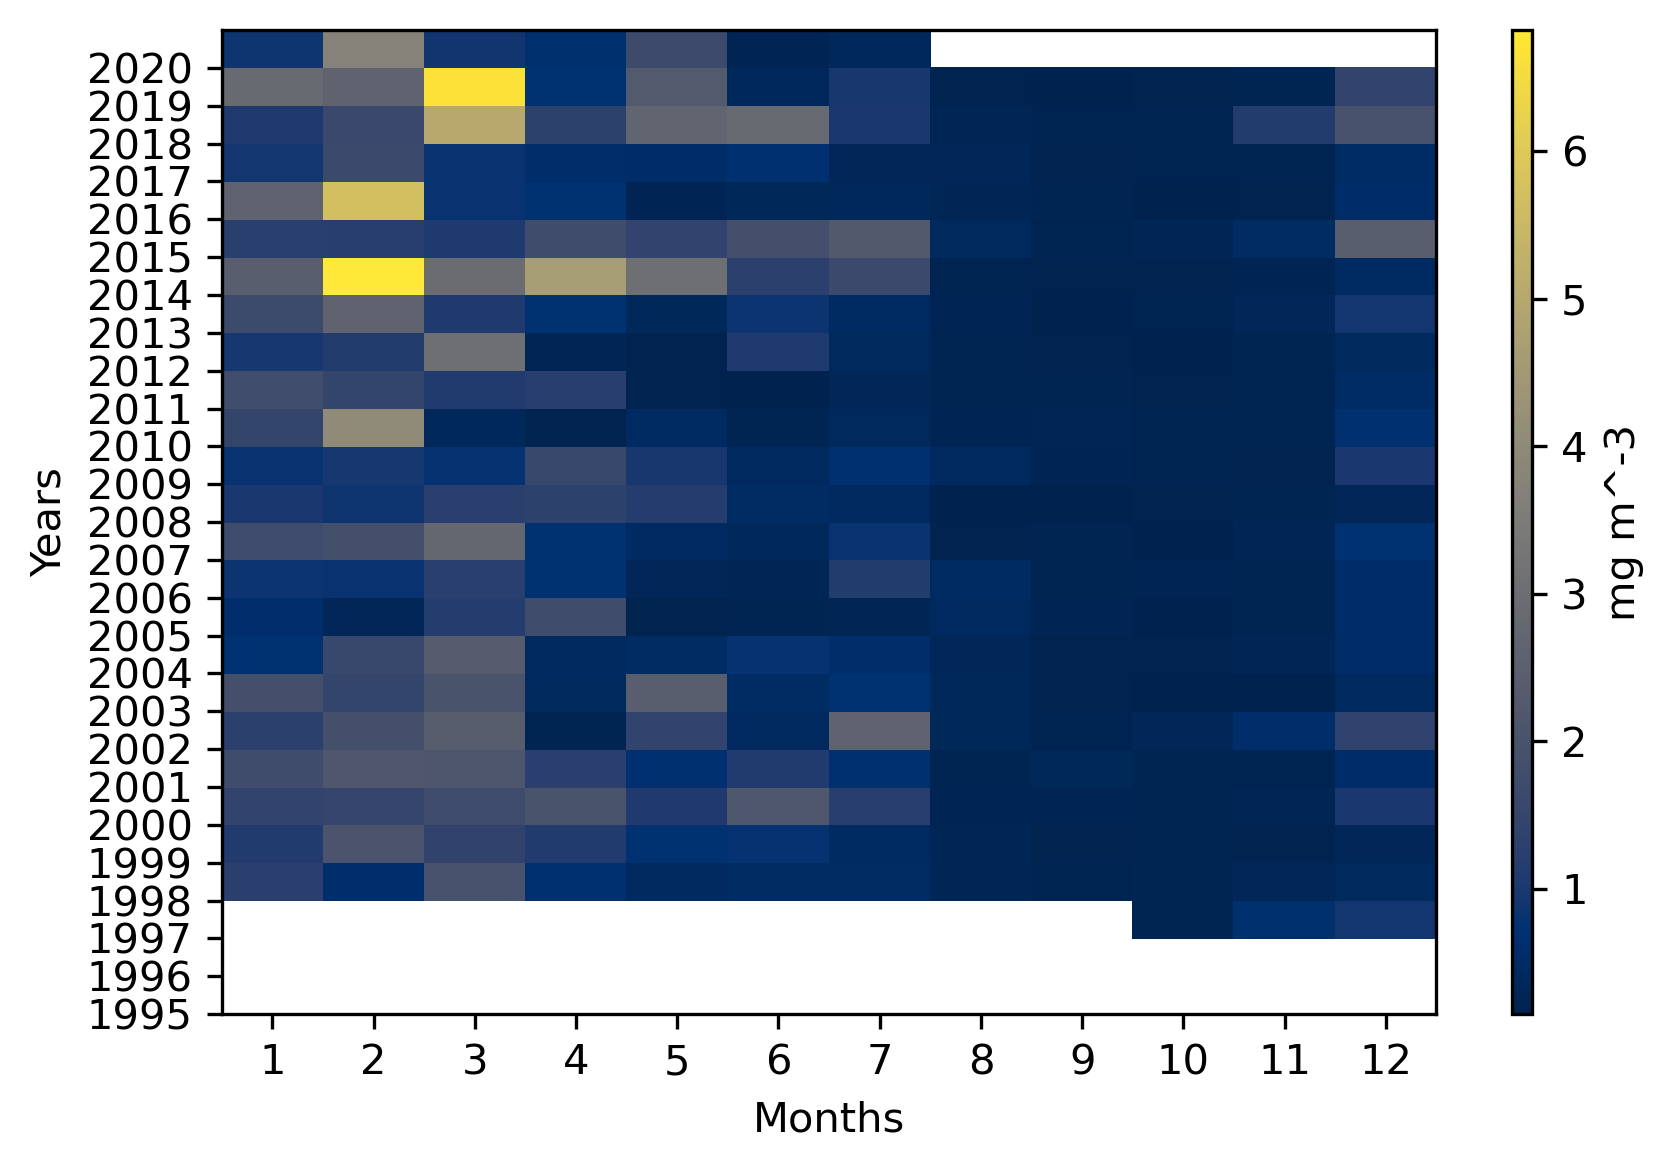

In [6]:
fig = plt.figure(dpi=300, tight_layout=True)
#fig.set_size_inches(8.27*1.5, 11.27*1.5, forward=True)

ax = np.zeros(2, dtype=object)
gs = fig.add_gridspec(1, 1, height_ratios=[1,],)
ax[0] = fig.add_subplot(gs[0, 0])

plot_yearmonth_cmap(ax[0], CARIACO.Satellite_chla)

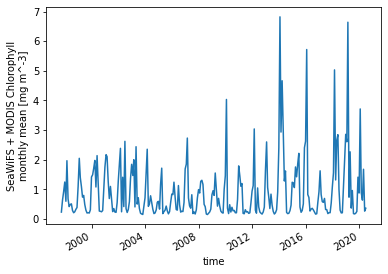

In [7]:
CARIACO.Satellite_chla.plot()

## trends over time series

- plot regimes somehow? rolling yearly mean?

In [8]:
import matplotlib.dates as mdates

def plot_timeseries_withtrend(ax, data, bottom0=False, rev_y=False):

    ax.xaxis.set_minor_locator(mdates.YearLocator())
    
    ax.grid(True,which='both', color='lightgrey')
    ax.tick_params(top=False, right=True, direction="in")
    
    #plot time series
    ax.plot(data.time, data, c='black', lw=0.5, zorder=0)
    ax.scatter(data.time, data, c='black', marker='x', zorder=0)
    
    if bottom0 == True:
        ax.set_ylim(bottom=0)
        
    # plot linear reg
    idx = np.isfinite(data.values)
    fit = np.polyfit(mdates.date2num(data.time[idx]), data.values[idx].flatten(), 1)
    fit_fn = np.poly1d(fit)
    
    ax.plot(data.time, fit_fn(mdates.date2num(data.time)), label='linear reg', zorder=5)
    
    if rev_y == True:
        ax.invert_yaxis()
    
    
    years = np.unique(CARIACO.DON.time.astype('datetime64[Y]'))
    ax.set_xlim(years[0], years[len(years)-1])
    
    return ax

<AxesSubplot:>

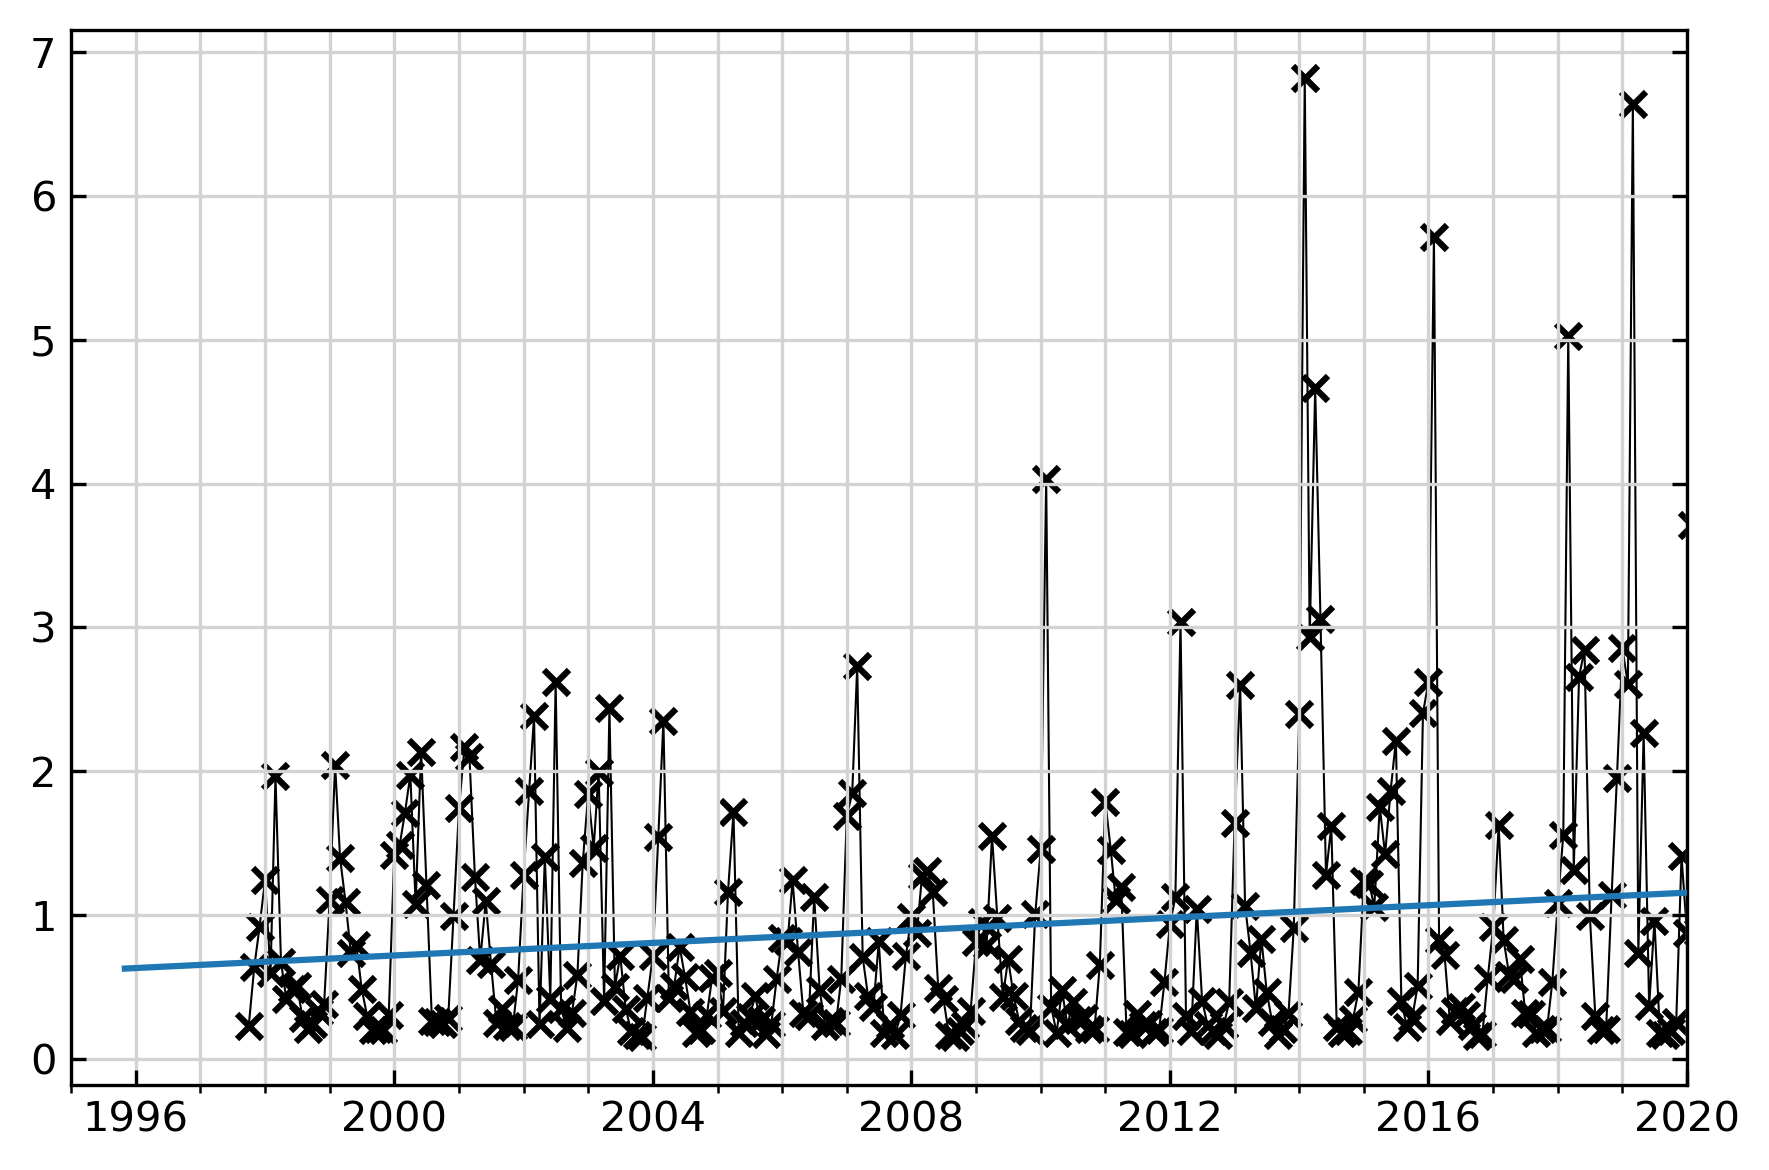

In [9]:
fig = plt.figure(dpi=300, tight_layout=True)
#fig.set_size_inches(8.27*1.5, 11.27*1.5, forward=True)

ax = np.zeros(2, dtype=object)
gs = fig.add_gridspec(1, 1, height_ratios=[1,],)
ax[0] = fig.add_subplot(gs[0, 0])

plot_timeseries_withtrend(ax[0], CARIACO.Satellite_chla)

## deviation from mean

In [10]:
yearly_mean = CARIACO.DON.groupby(CARIACO.DON.time.dt.year).mean()
yearly_mean

years = np.unique(CARIACO.DON.time.astype('datetime64[Y]'))
years

array(['1995-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2000-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [11]:
def plot_deviationfrommean(ax, data, bottom0=False, rev_y=False):

    ax.xaxis.set_minor_locator(mdates.YearLocator())
    
    ax.grid(True,which='both', color='lightgrey')
    ax.tick_params(top=False, right=True, direction="in")
    
    #ax.plot(data.time, data, c='black', lw=0.5, zorder=0)
    
    yearly_mean = data.groupby(data.time.dt.year).mean()
    
    yearly_counts = data.groupby(data.time.dt.year).count()
    
    yearly_mean[yearly_counts<5] = np.nan
    
    years = np.unique(data.time.astype('datetime64[Y]'))

    dat_mean = np.nanmean(data.values)
    #plot time series
    #ax.bar(x=data.time, height=data-dat_mean, align='edge', bottom=dat_mean, width=7.5)#, width=1)
    
    ax.bar(x=years, height=yearly_mean-dat_mean, align='edge', bottom=dat_mean, width=365.1, alpha=0.5)#, width=1)

    ax.axhline(y=dat_mean)

    if bottom0 == True:
        ax.set_ylim(bottom=0)
        
    
    years = np.unique(CARIACO.DON.time.astype('datetime64[Y]'))
    ax.set_xlim(years[0], years[len(years)-1])
    
    if rev_y == True:
        ax.invert_yaxis()
    
    return ax

<AxesSubplot:>

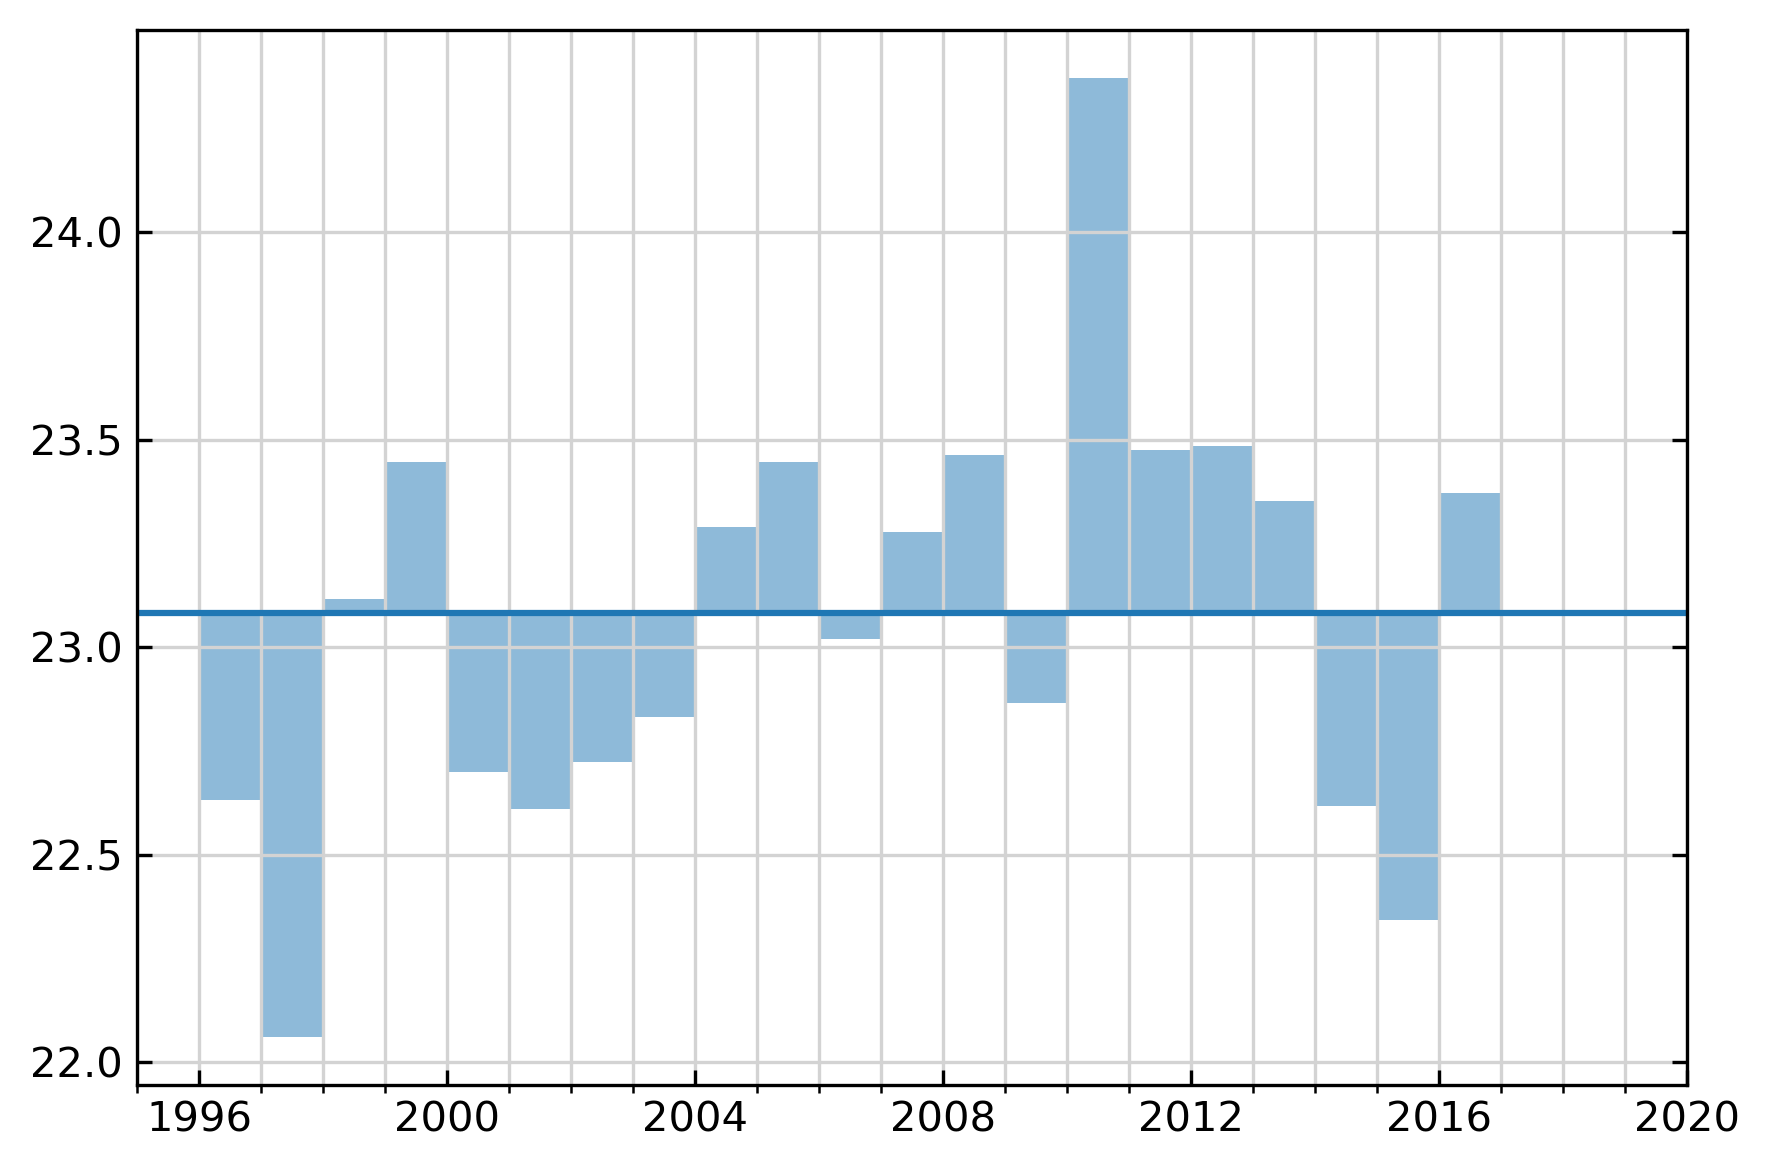

In [12]:
fig = plt.figure(dpi=300, tight_layout=True)
#fig.set_size_inches(8.27*1.5, 11.27*1.5, forward=True)

ax = np.zeros(2, dtype=object)
gs = fig.add_gridspec(1, 1, height_ratios=[1,],)
ax[0] = fig.add_subplot(gs[0, 0])

plot_deviationfrommean(ax[0], CARIACO.Temperature)

### monthly deviation

In [13]:
def plot_deviationfrommean_monthly(ax, data, bottom0=False, rev_y=False):

    ax.xaxis.set_minor_locator(mdates.YearLocator())
    
    ax.grid(True,which='both', color='lightgrey')
    ax.tick_params(top=False, right=True, direction="in")
    
    #ax.plot(data.time, data, c='black', lw=0.5, zorder=0)
    #data_ti = data.set_index(time='time')
    
    monthly_mean = data.resample(time="M").mean()
    
    monthly_counts = data.resample(time="M").count()
    
    monthly_mean[monthly_counts<1] = np.nan
    
    months = np.unique(data.time.astype('datetime64[M]'))
    
    #print(yearly_mean, yearly_counts, years)
    
    dat_mean = np.nanmean(data.values)
    #plot time series
    #ax.bar(x=data.time, height=data-dat_mean, align='edge', bottom=dat_mean, width=7.5)#, width=1)
    
    ax.bar(x=months, height=monthly_mean-dat_mean, align='edge', bottom=dat_mean, width=30.1, zorder=1)#, width=1)

    ax.axhline(y=dat_mean)

    if bottom0 == True:
        ax.set_ylim(bottom=0)
    ax.set_xlim(months[0], months[len(months)-1])
    
    if rev_y == True:
        ax.invert_yaxis()
    
    # YEARLY
    yearly_mean = data.groupby(data.time.dt.year).mean()
    
    yearly_counts = data.groupby(data.time.dt.year).count()
    
    yearly_mean[yearly_counts<5] = np.nan
    
    years = np.unique(data.time.astype('datetime64[Y]'))

    #plot time series
    #ax.bar(x=data.time, height=data-dat_mean, align='edge', bottom=dat_mean, width=7.5)#, width=1)
    
    ax.bar(x=years, height=yearly_mean-dat_mean, align='edge', bottom=dat_mean, width=365.1, alpha=0.5,zorder=10)#, width=1)

    
    return ax

<AxesSubplot:>

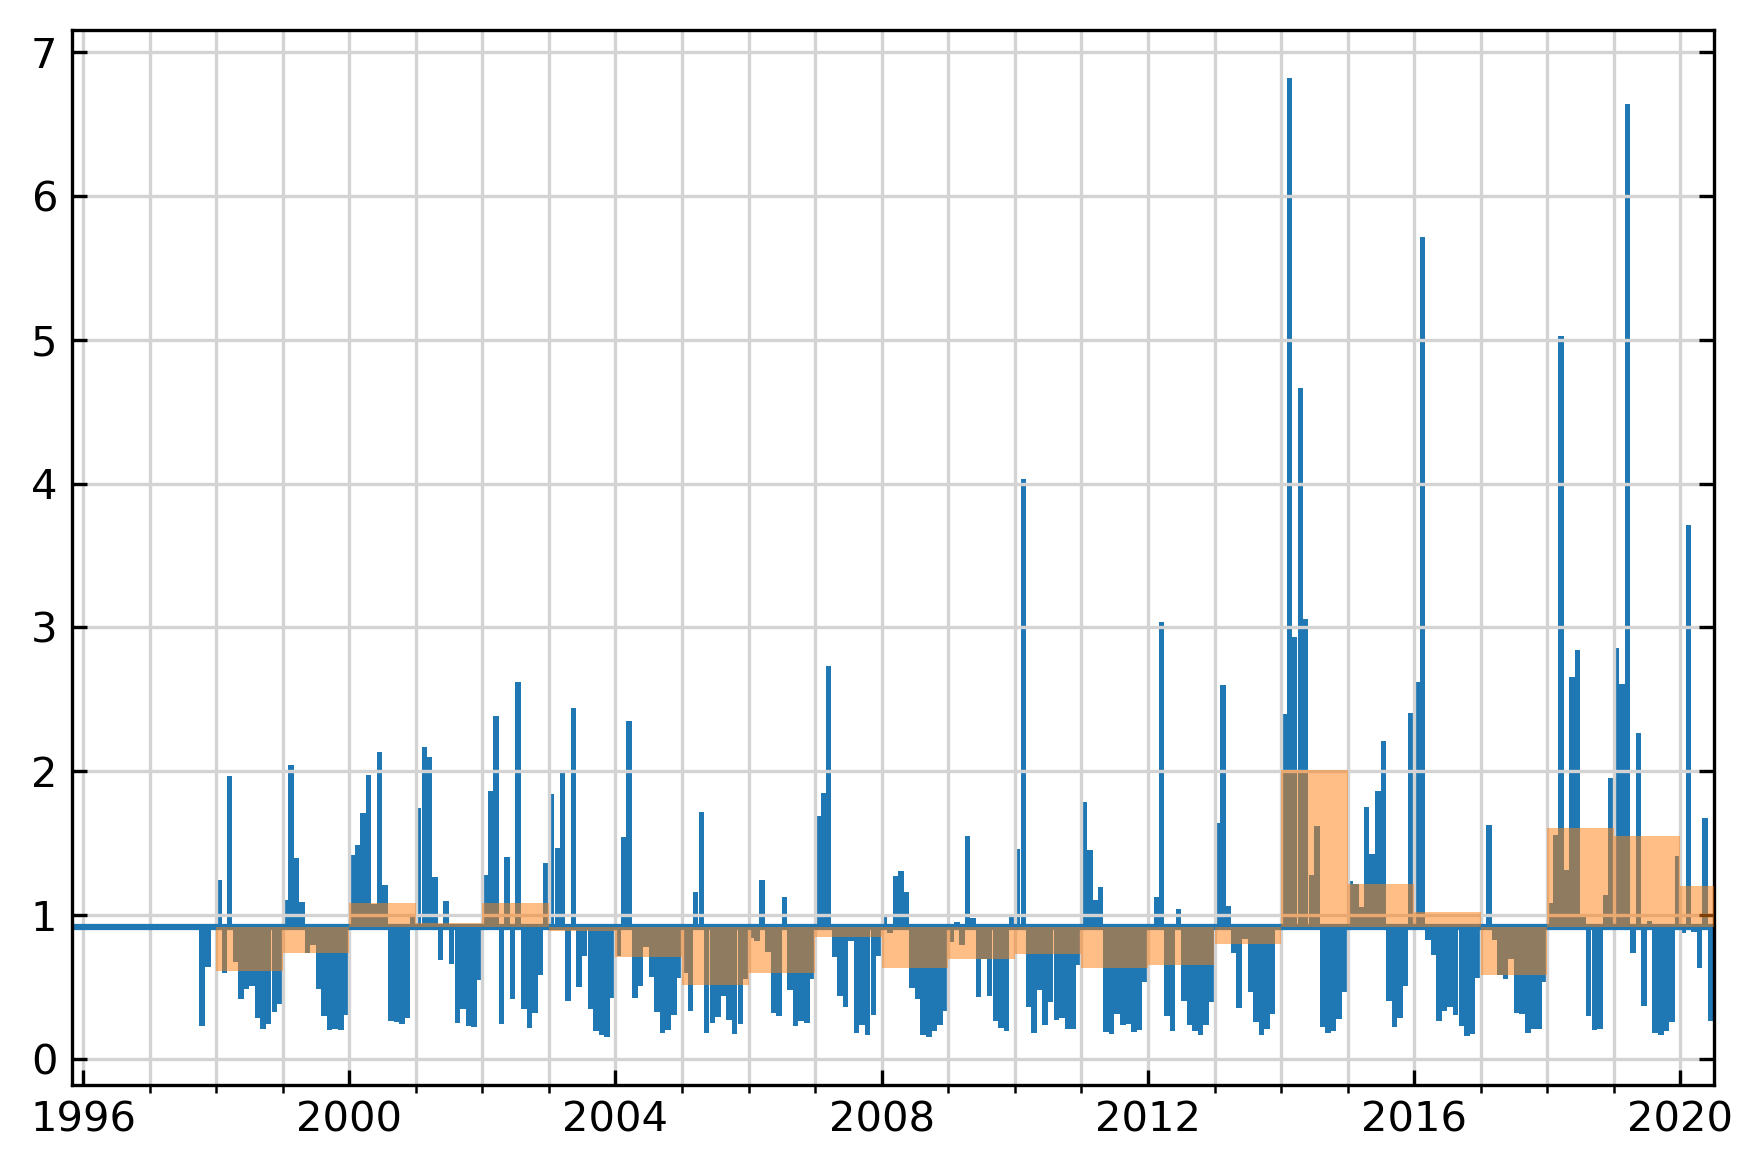

In [14]:
fig = plt.figure(dpi=300, tight_layout=True)
#fig.set_size_inches(8.27*1.5, 11.27*1.5, forward=True)

ax = np.zeros(2, dtype=object)
gs = fig.add_gridspec(1, 1, height_ratios=[1,],)
ax[0] = fig.add_subplot(gs[0, 0])

plot_deviationfrommean_monthly(ax[0], CARIACO.Satellite_chla)

<AxesSubplot:>

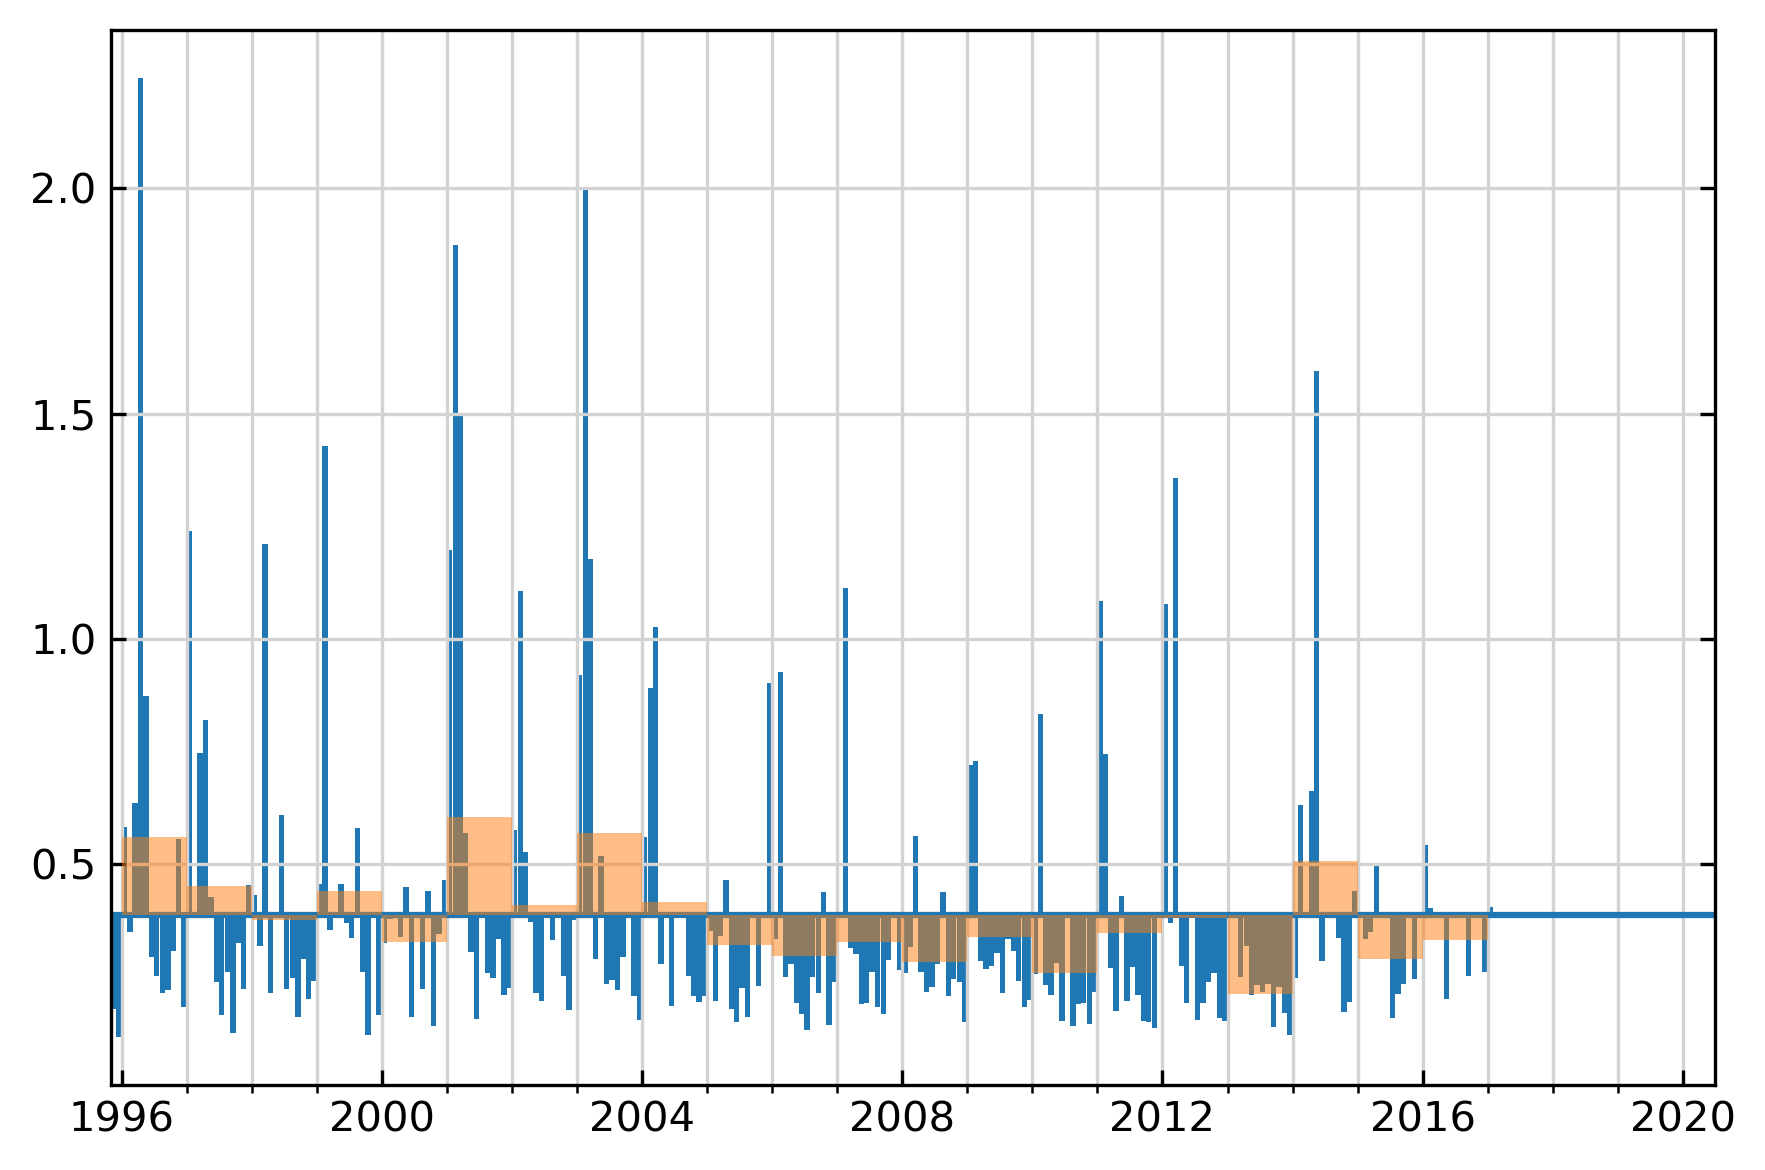

In [15]:
fig = plt.figure(dpi=300, tight_layout=True)
#fig.set_size_inches(8.27*1.5, 11.27*1.5, forward=True)

ax = np.zeros(2, dtype=object)
gs = fig.add_gridspec(1, 1, height_ratios=[1,],)
ax[0] = fig.add_subplot(gs[0, 0])

plot_deviationfrommean_monthly(ax[0], CARIACO.Chlorophyll)

# ToDo:
- one plot to showcase time series data
- one plot to showcase ERA5 data
- one plot to showcase satellite data
- show Chlorophyll Dynamics (+ species Richness/counts)
- show Wind/Upwelling dynamics

In [ ]:
# show time-series data
- Chlorophyll
- NO3
- PO3
- SiO4


<AxesSubplot:xlabel='Months', ylabel='Years'>

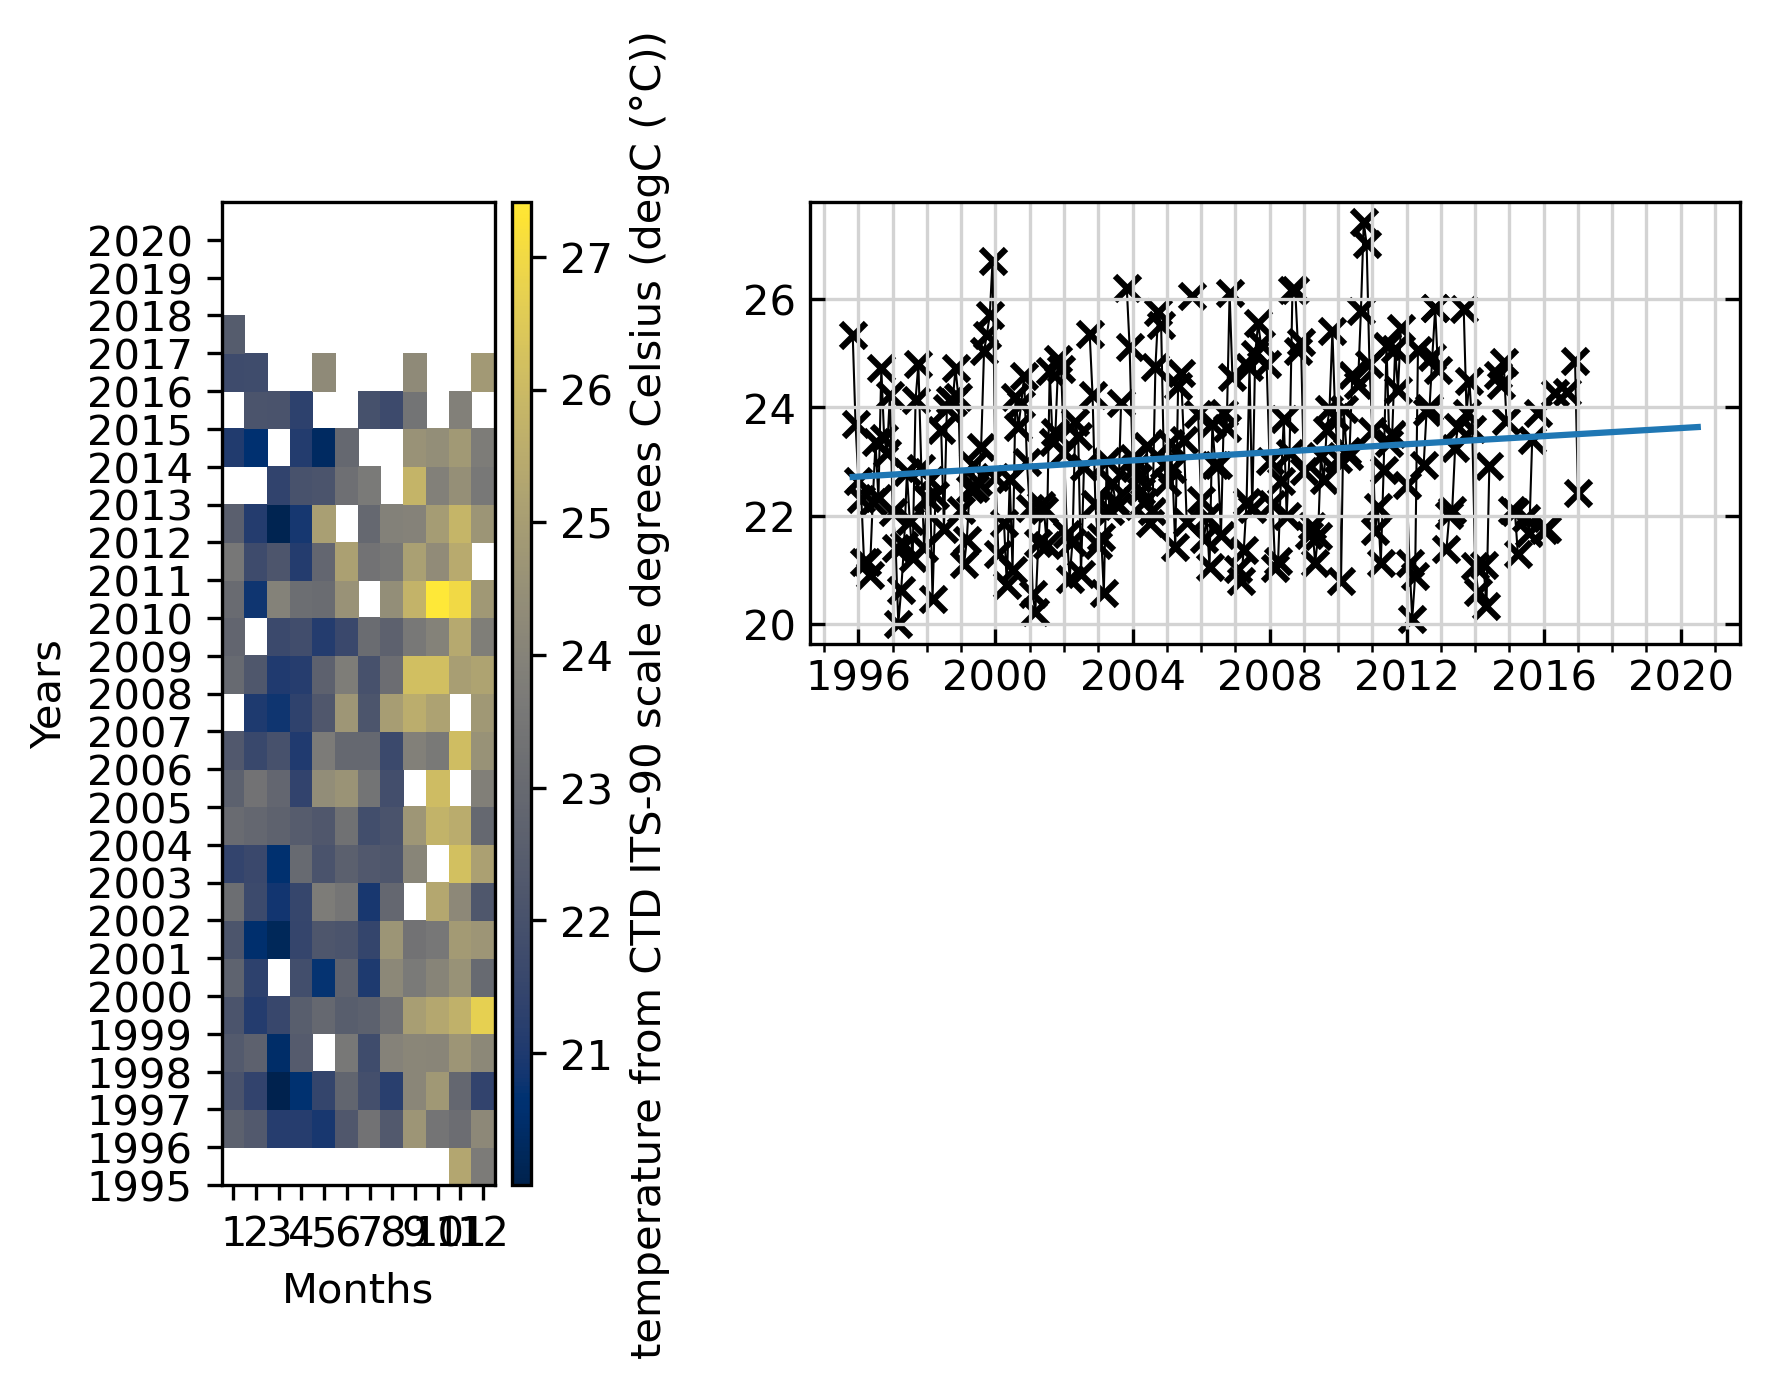

In [133]:
fig = plt.figure(dpi=300, tight_layout=True)
#fig.set_size_inches(8.27*1.5, 11.27*1.5, forward=True)

ax = np.zeros(2, dtype=object)
gs = fig.add_gridspec(2, 3, height_ratios=[1,1],)
ax[0] = fig.add_subplot(gs[0, 1:])
ax[1] = fig.add_subplot(gs[0:2, 0])

plot_timeseries_withtrend(ax[0], CARIACO.Temperature)

plot_yearmonth_cmap(ax[1], CARIACO.Temperature)

In [17]:
import textwrap
def plotsingle3panelplot(dataset, subset='FILL', bottom0=False):
    fig = plt.figure(dpi=400, tight_layout=True)
    fig.set_size_inches(10, 6, forward=True)

    #plt.figtext(0.02, .999, description, fontsize = 'small')
    title_fontsize = 'large'
    ax = np.zeros(6, dtype=object)
    gs = fig.add_gridspec(3, 3, height_ratios=[1,1,1,],)
    ax[0] = fig.add_subplot(gs[:2, 0])
    ax[1] = fig.add_subplot(gs[0, 1:])
    ax[2] = fig.add_subplot(gs[1, 1:])

    
    plot_yearmonth_cmap(ax[0], dataset, bottom0=bottom0)
    ax[0].set_title(dataset.name, fontsize = title_fontsize)
    plot_timeseries_withtrend(ax[1], dataset, bottom0=bottom0)
    attrs0 = dataset.attrs
    ax[1].set_title('%s, %s, %s'%(textwrap.shorten(attrs0['long_name'], width=36), attrs0['source'], attrs0['subset']))
    plot_deviationfrommean(ax[2], dataset, bottom0=bottom0)
    plt.tight_layout()
    return ax

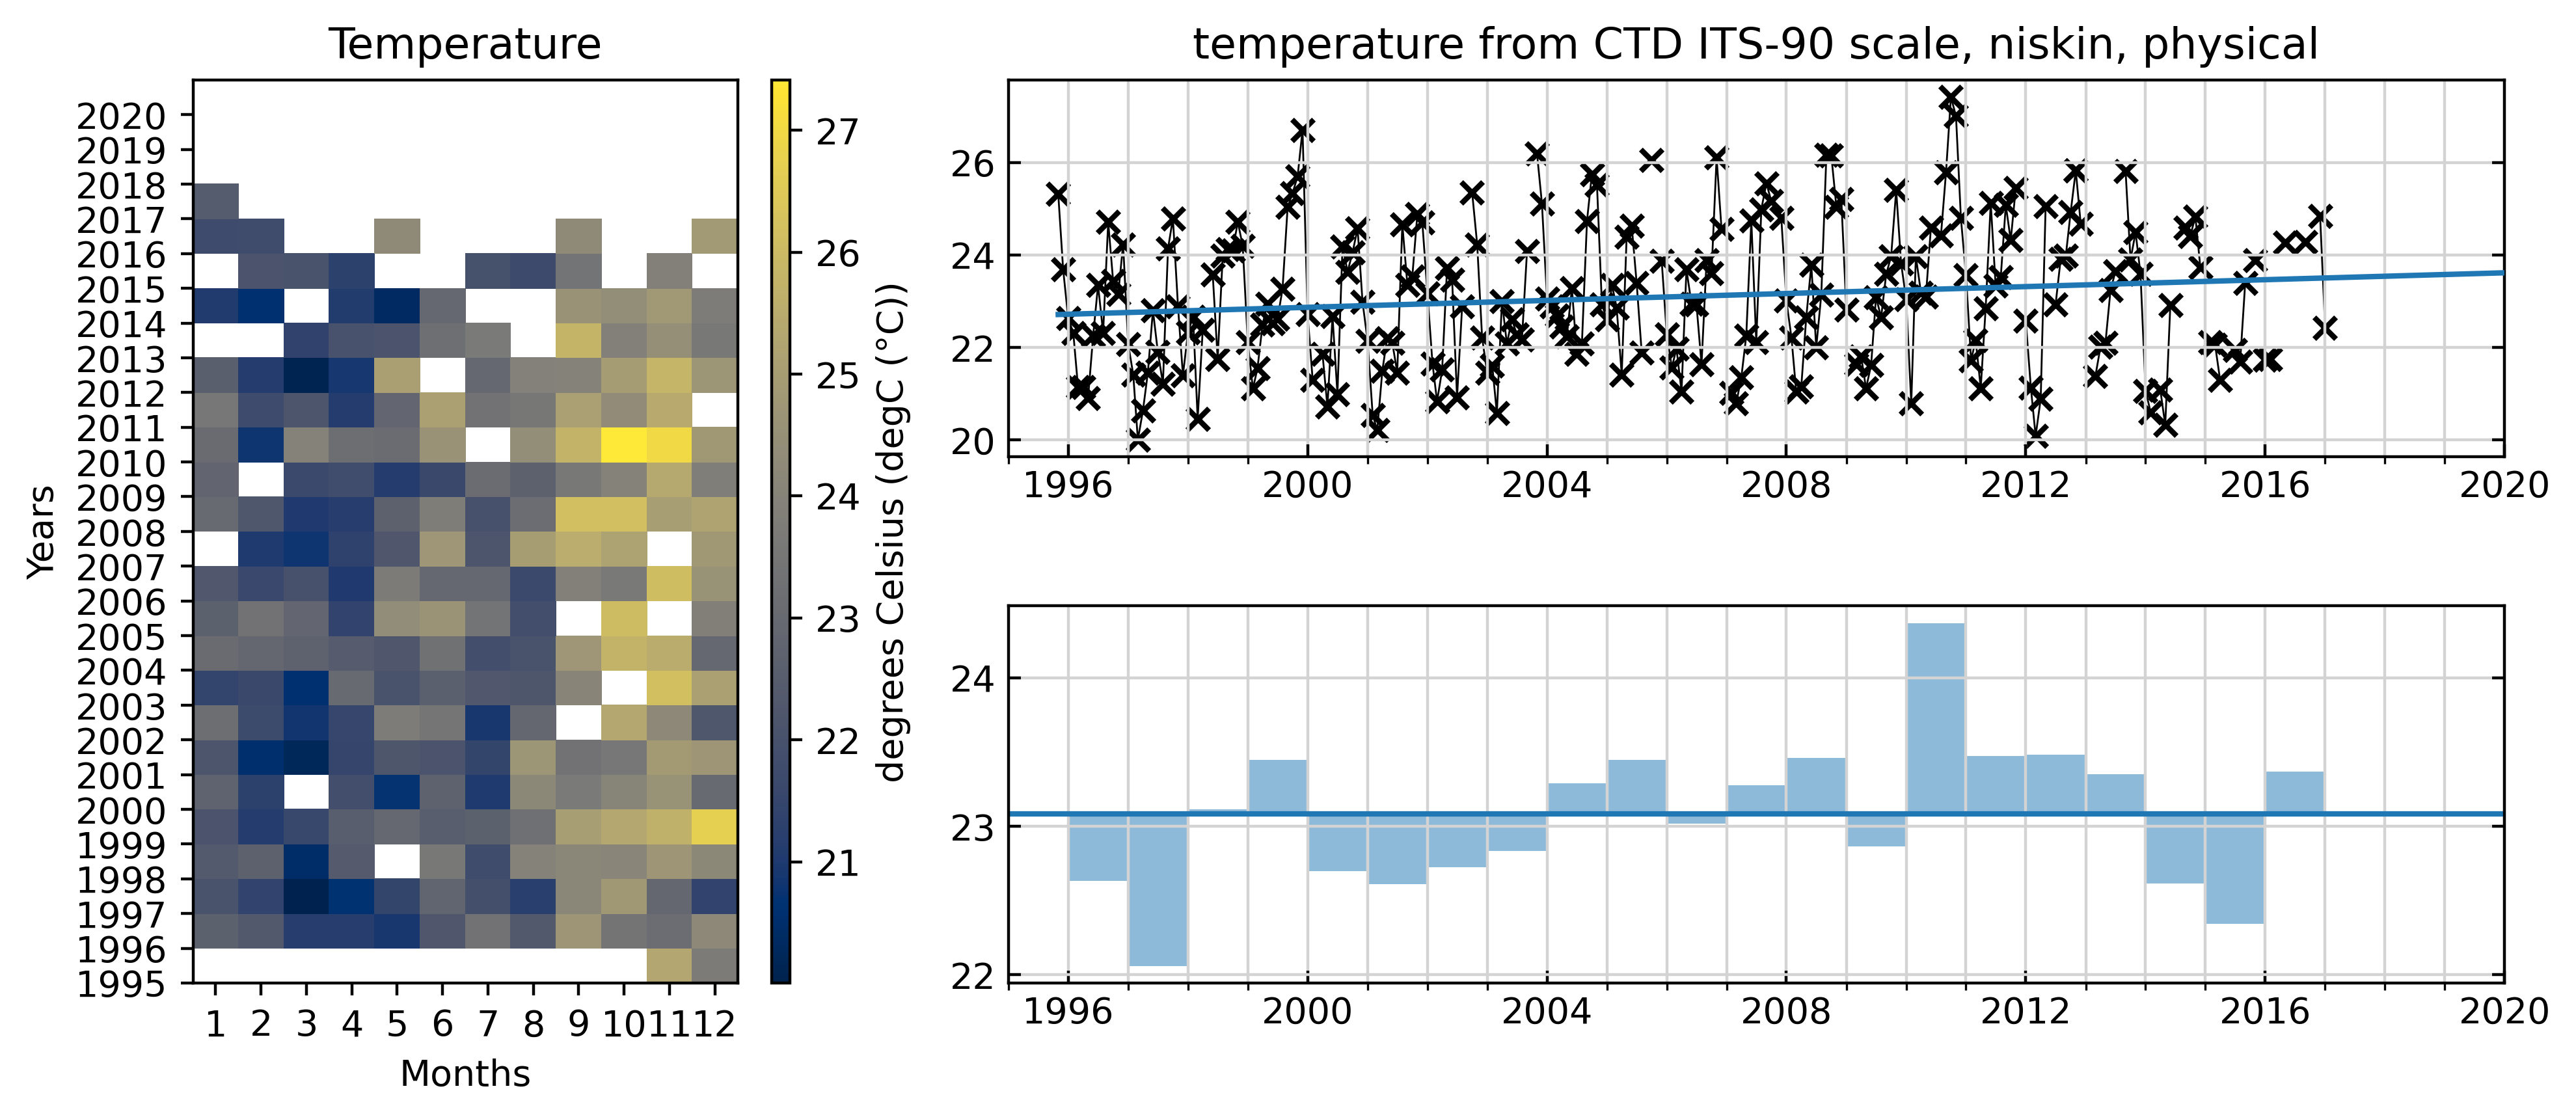

In [168]:
plotsingle3panelplot(CARIACO.Temperature)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_Temperature.png")

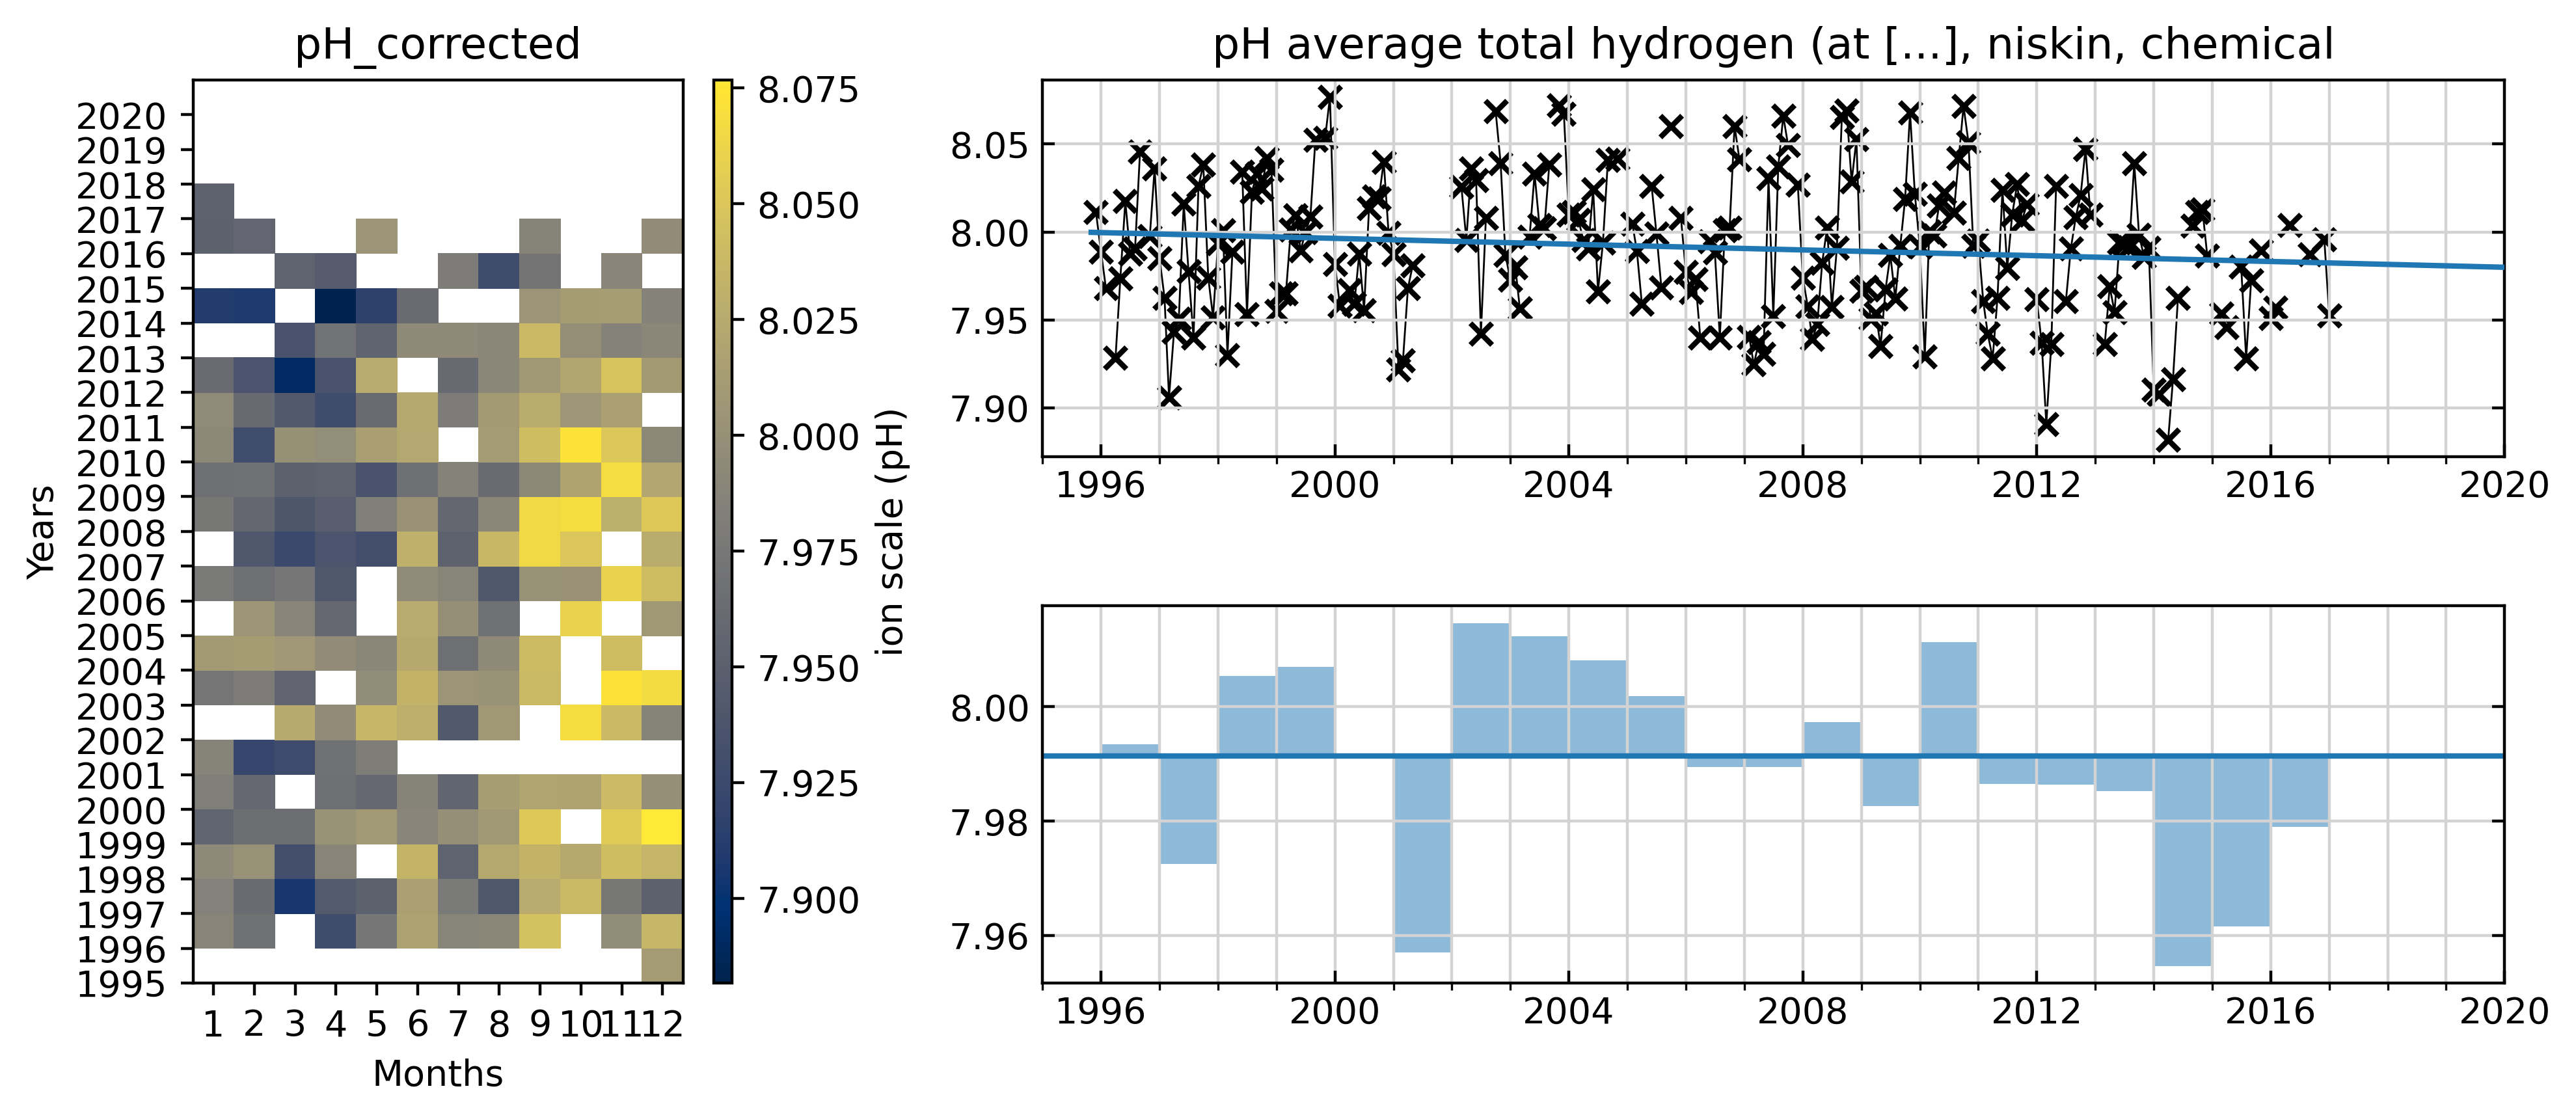

In [170]:
plotsingle3panelplot(CARIACO.pH_corrected)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_pH.png")

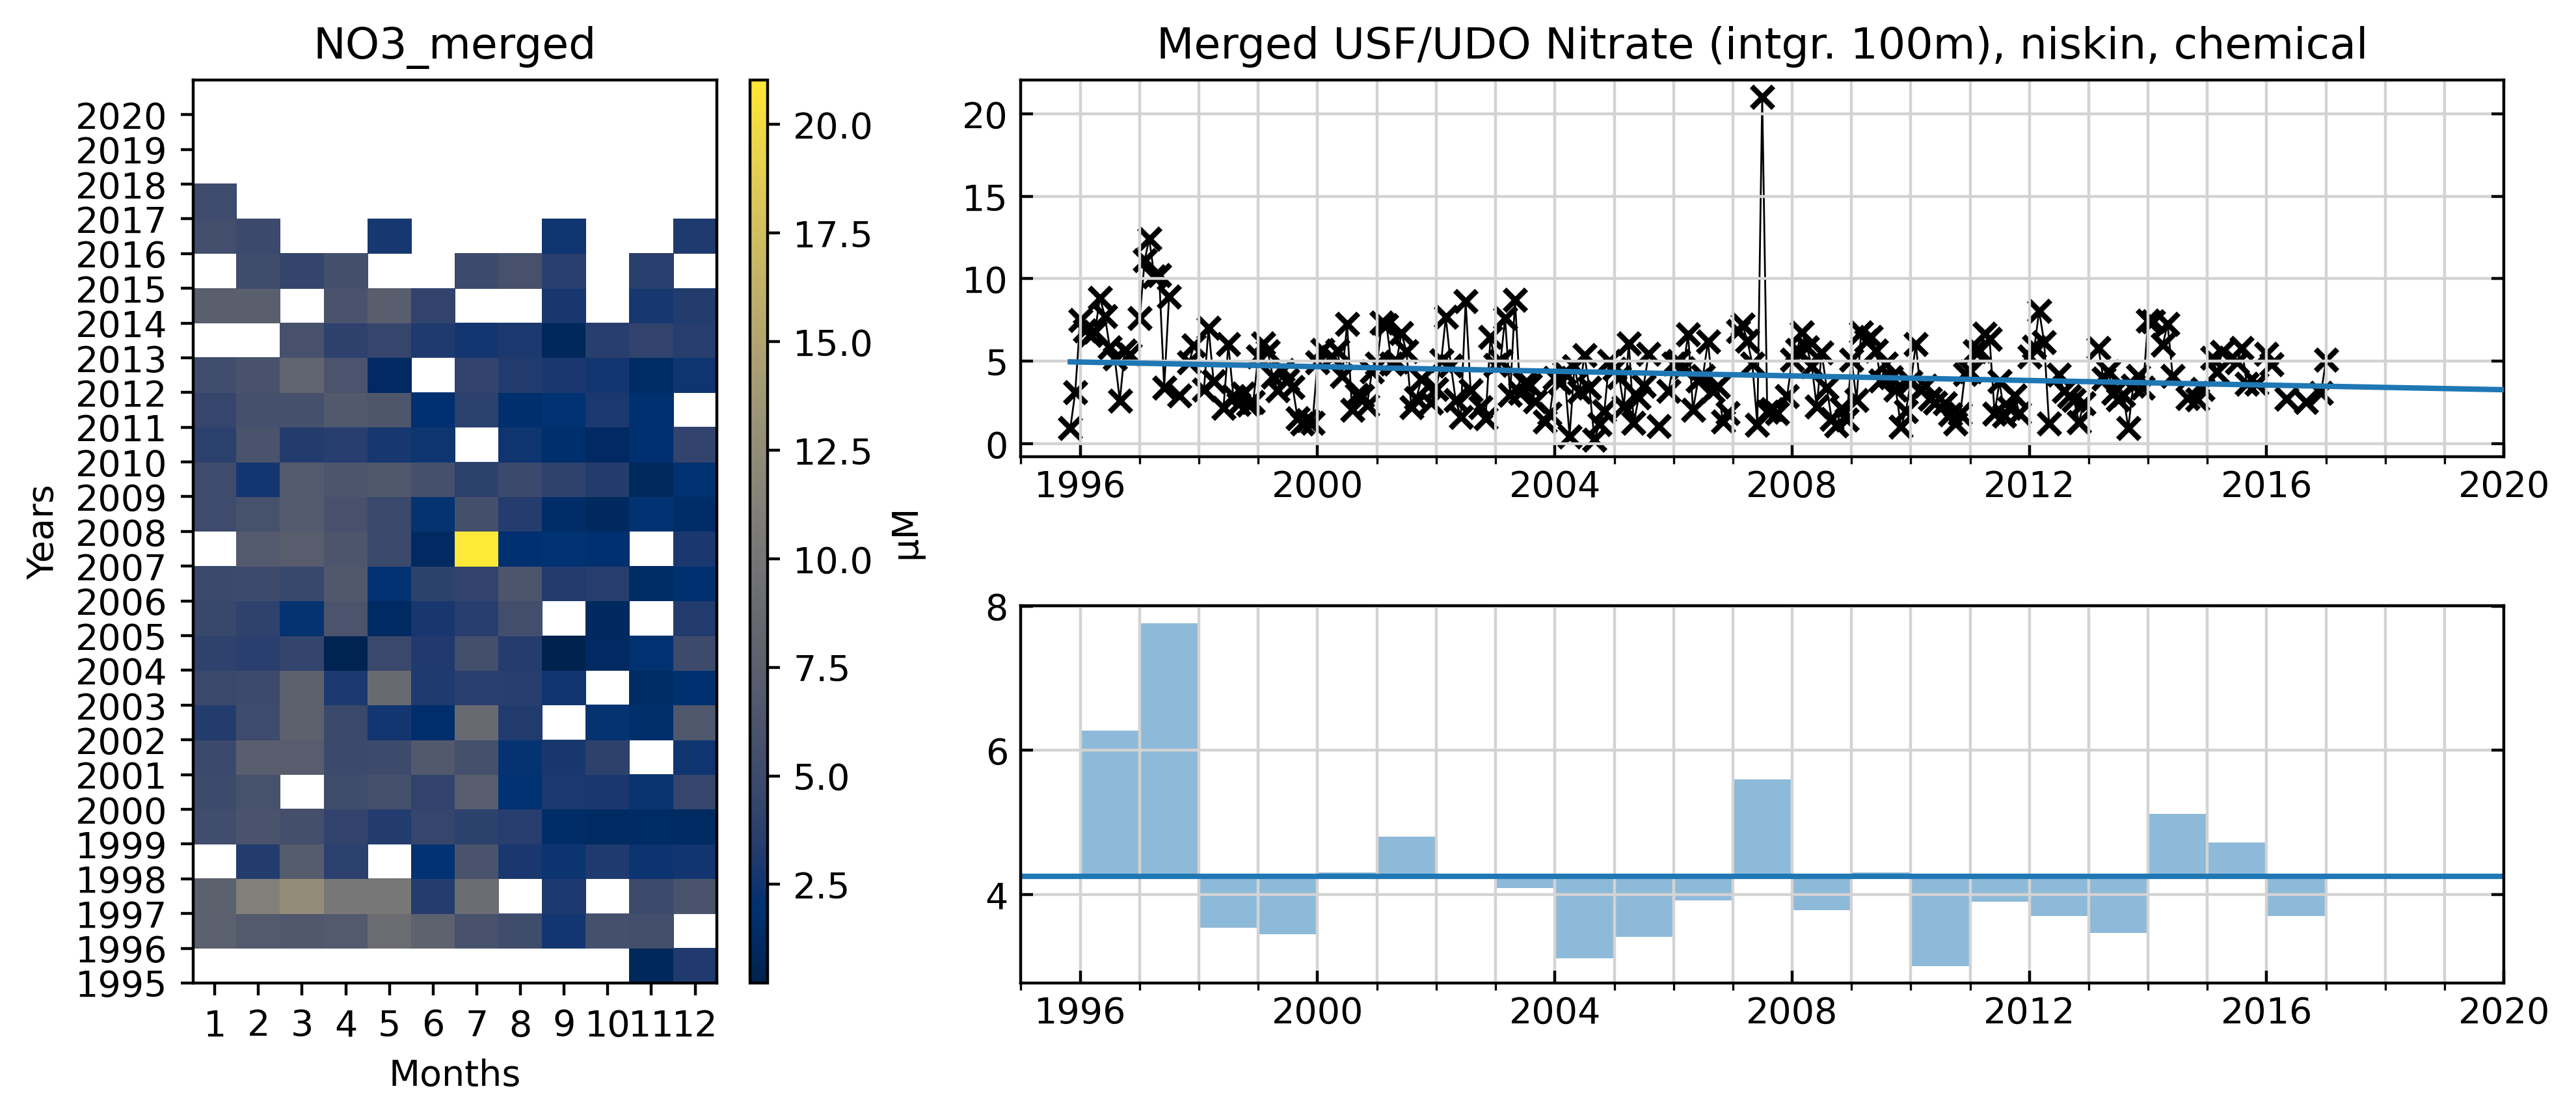

In [171]:
plotsingle3panelplot(CARIACO.NO3_merged)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_NO3_merged.png")

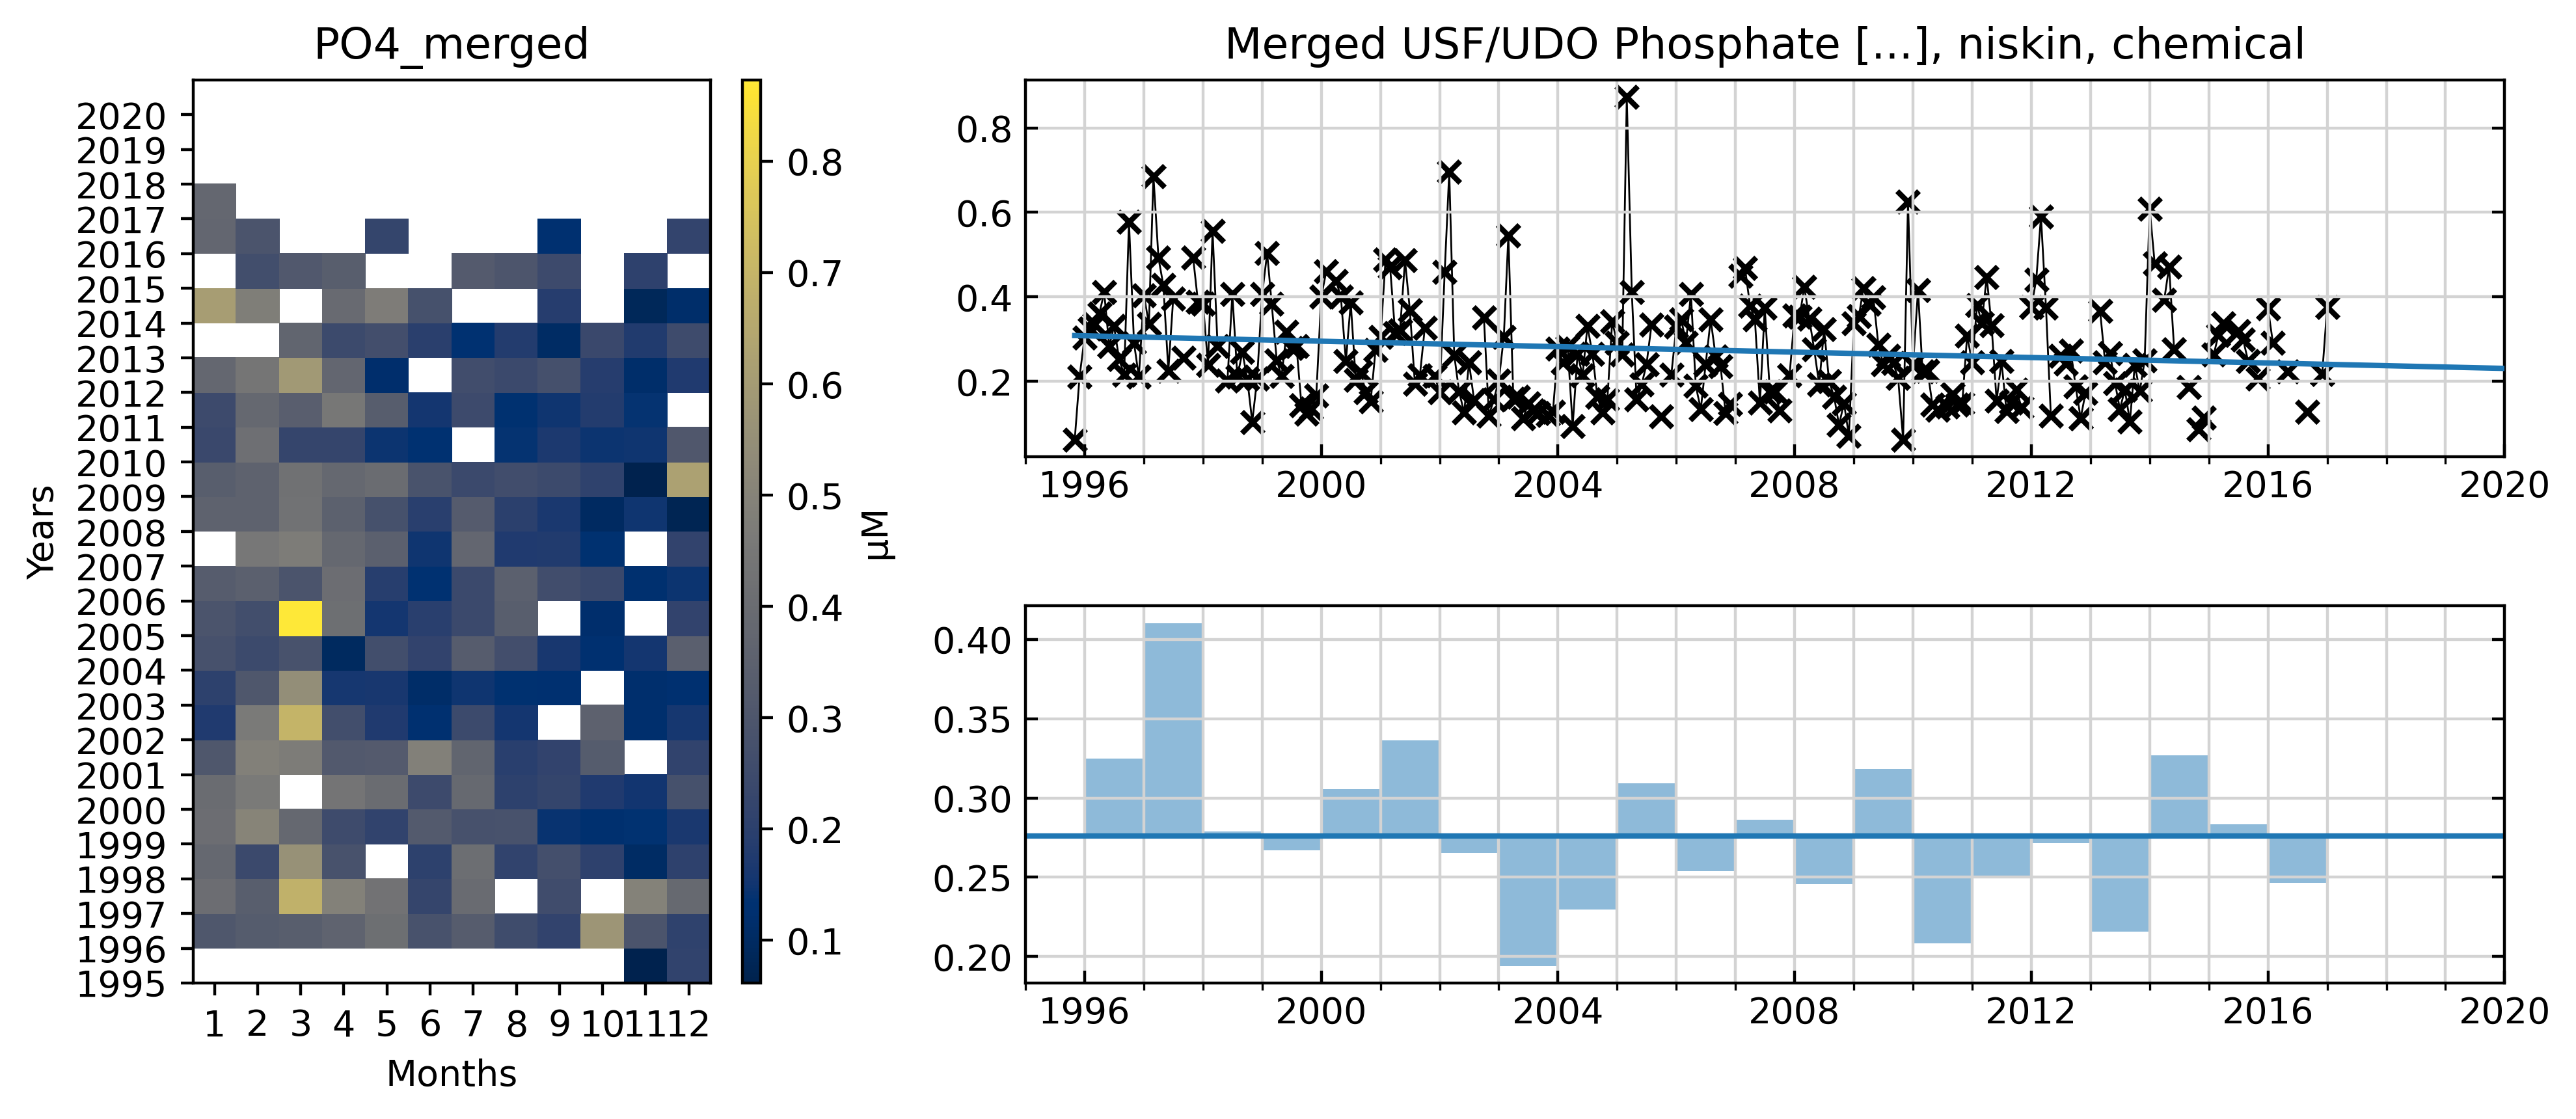

In [172]:
plotsingle3panelplot(CARIACO.PO4_merged)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_PO4_merged.png")

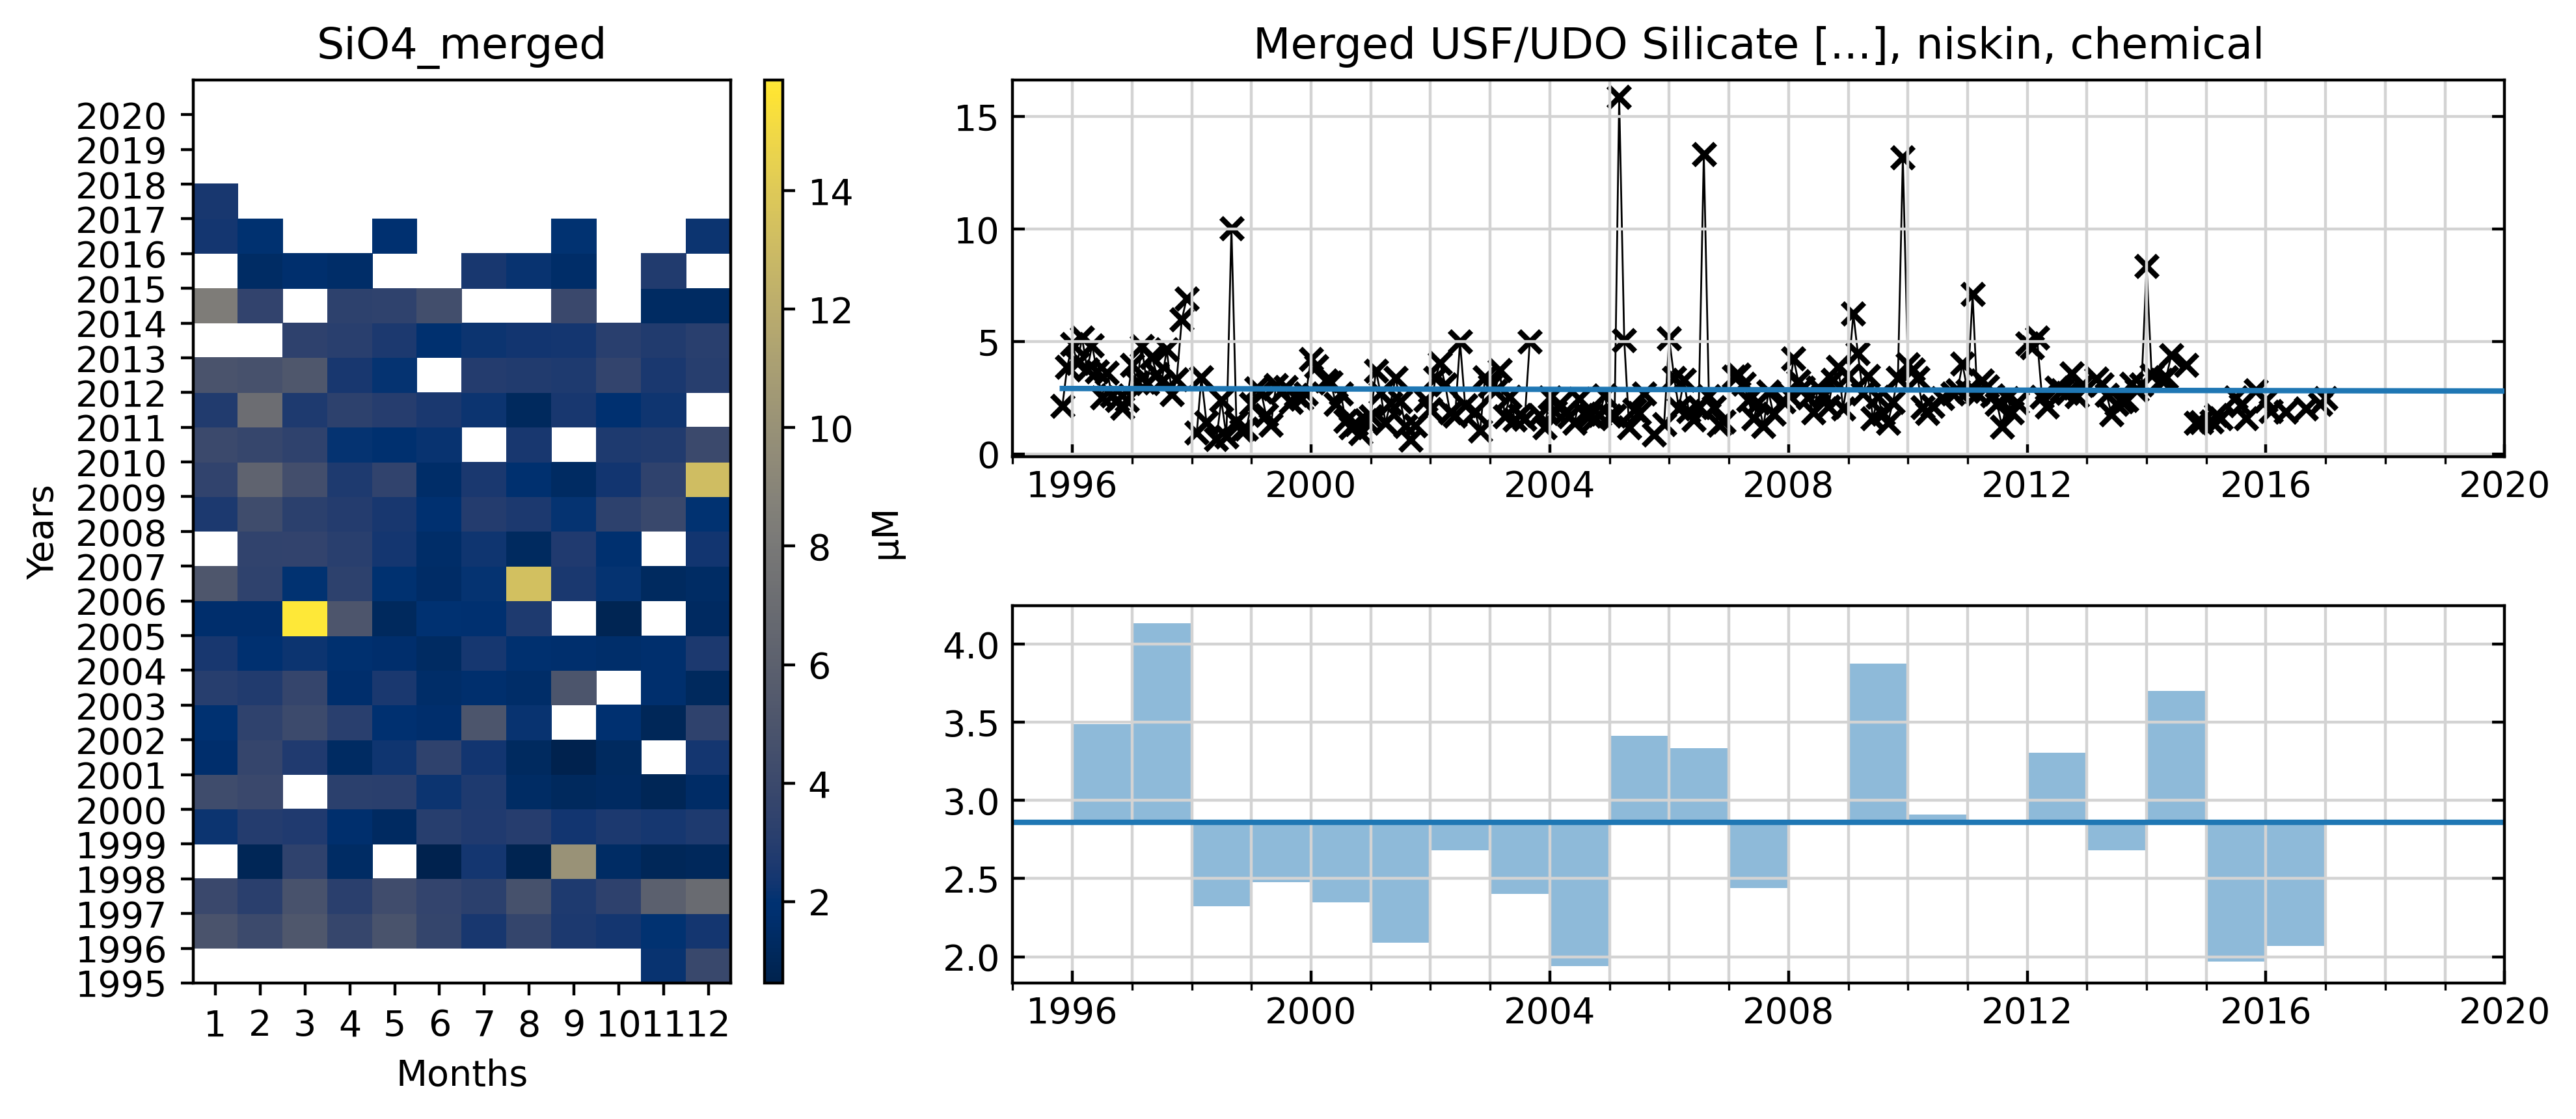

In [173]:
plotsingle3panelplot(CARIACO.SiO4_merged)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_SiO4_merged.png")

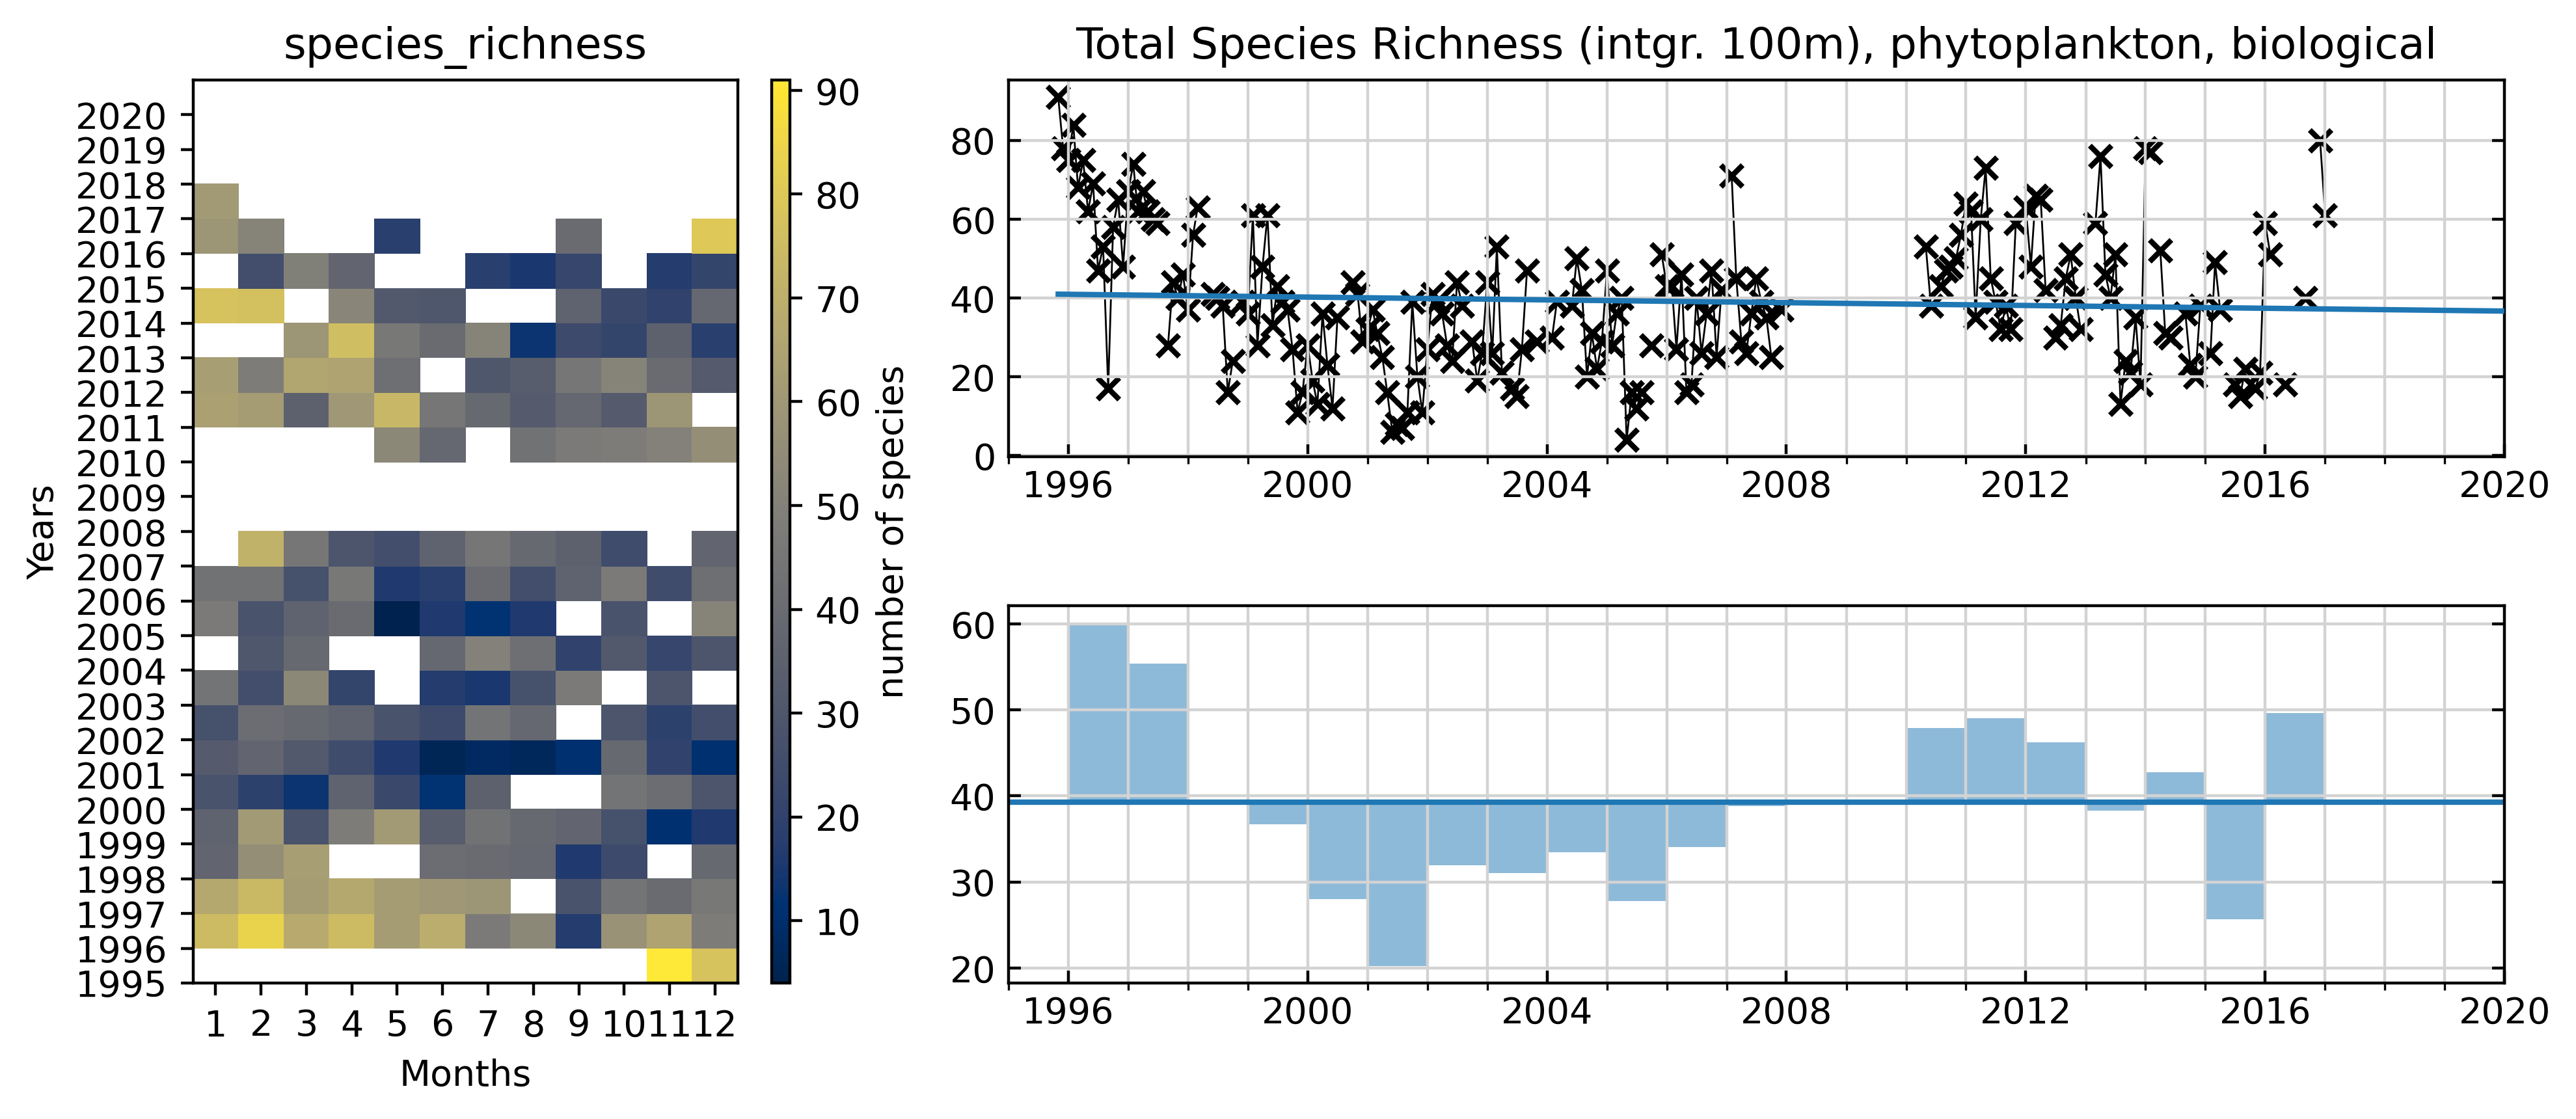

In [174]:
plotsingle3panelplot(CARIACO.species_richness)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_species_richness.png")

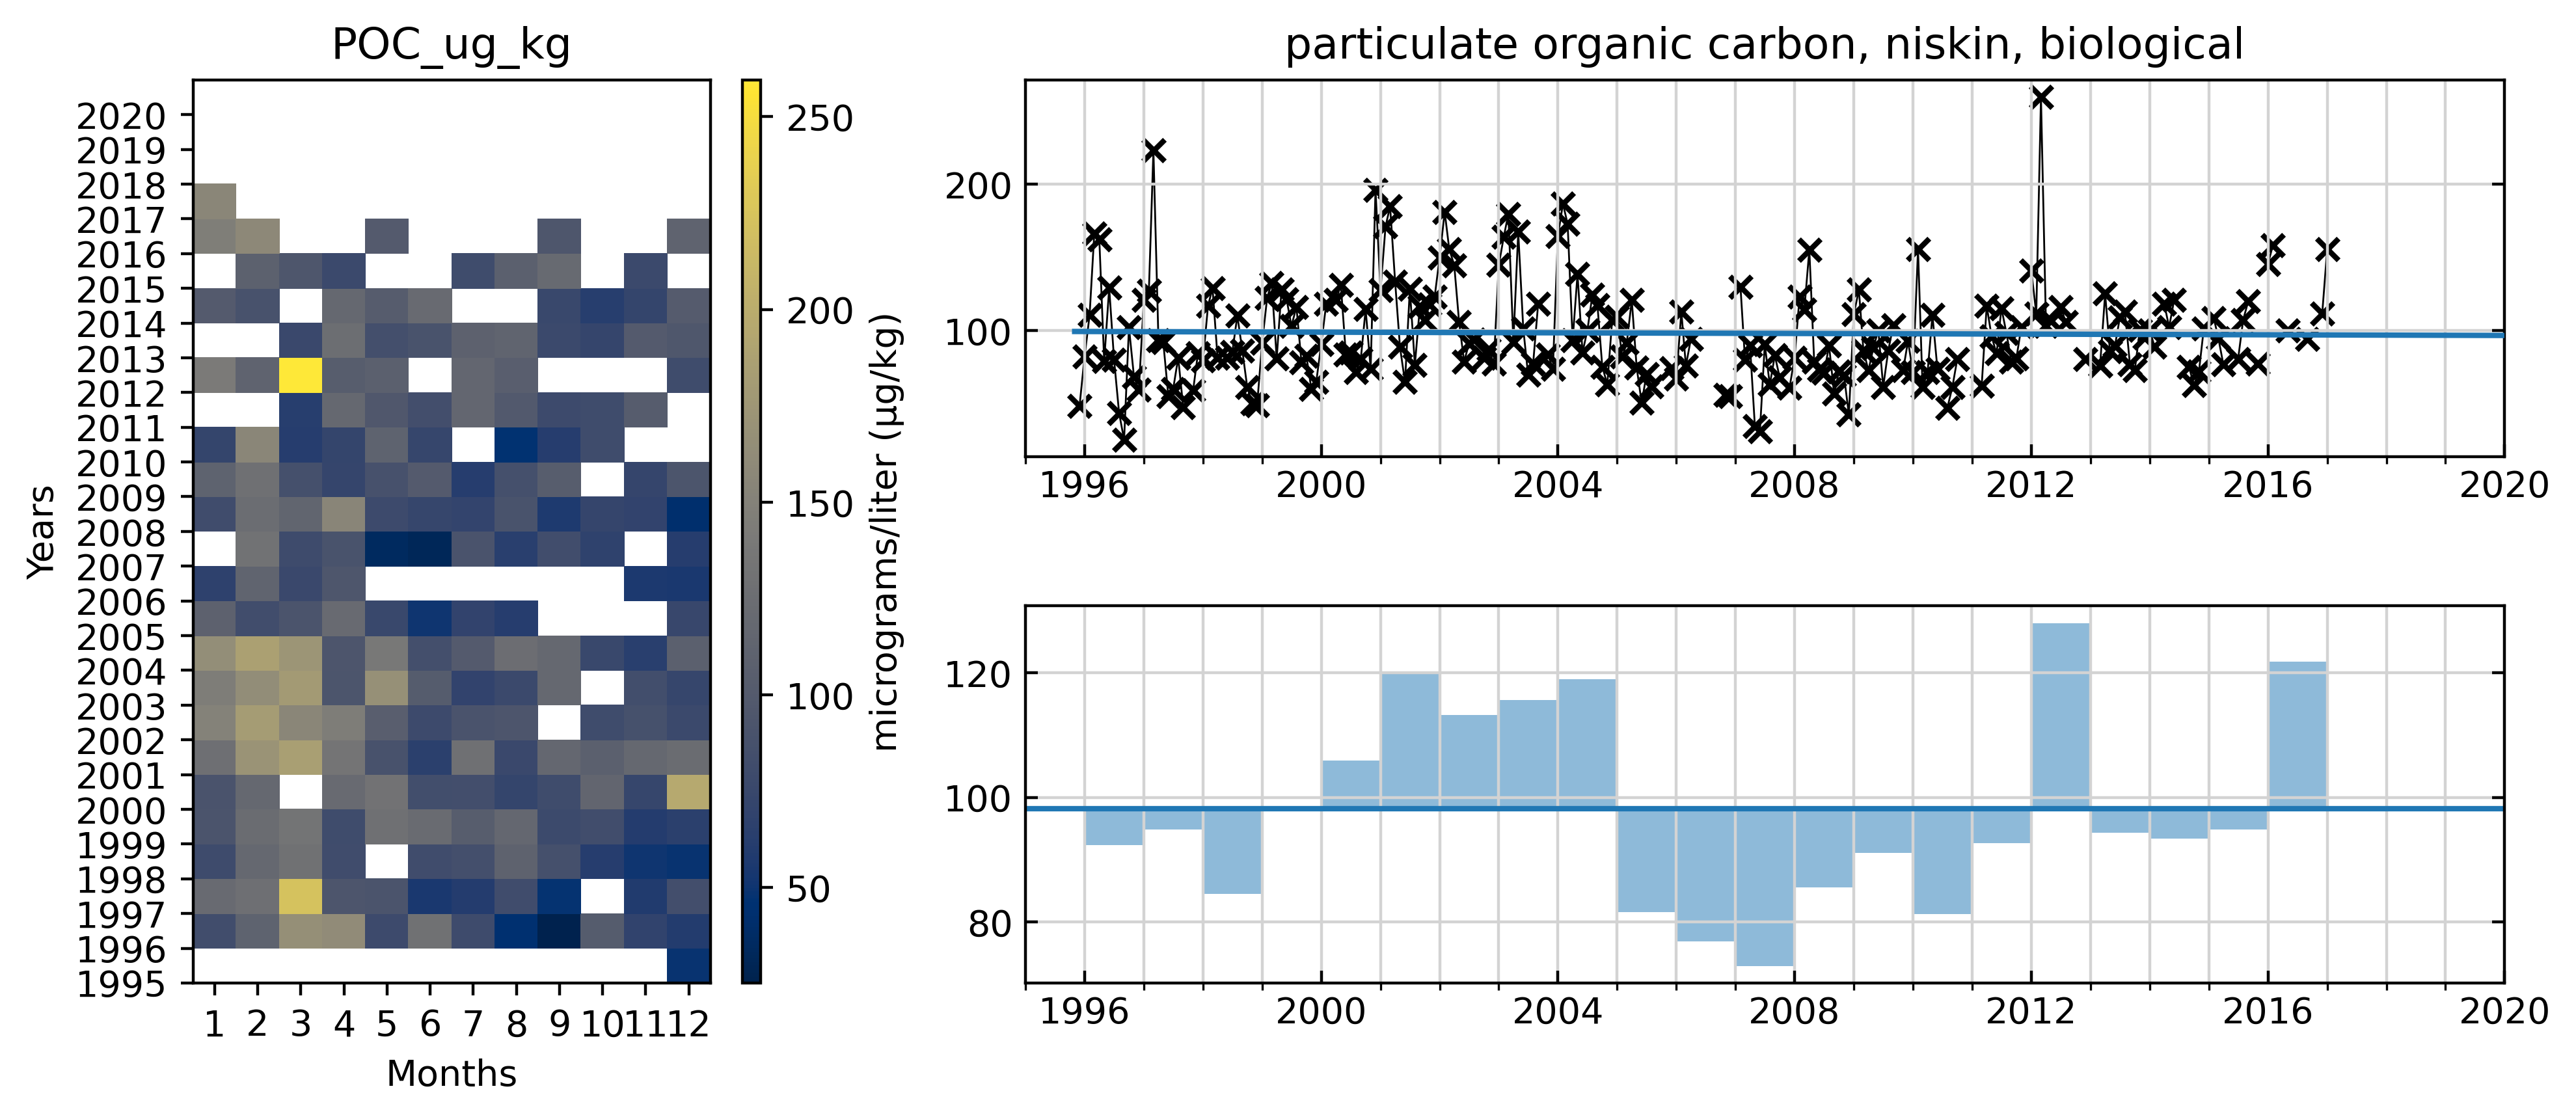

In [186]:
plotsingle3panelplot(CARIACO.POC_ug_kg)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_POC.png")

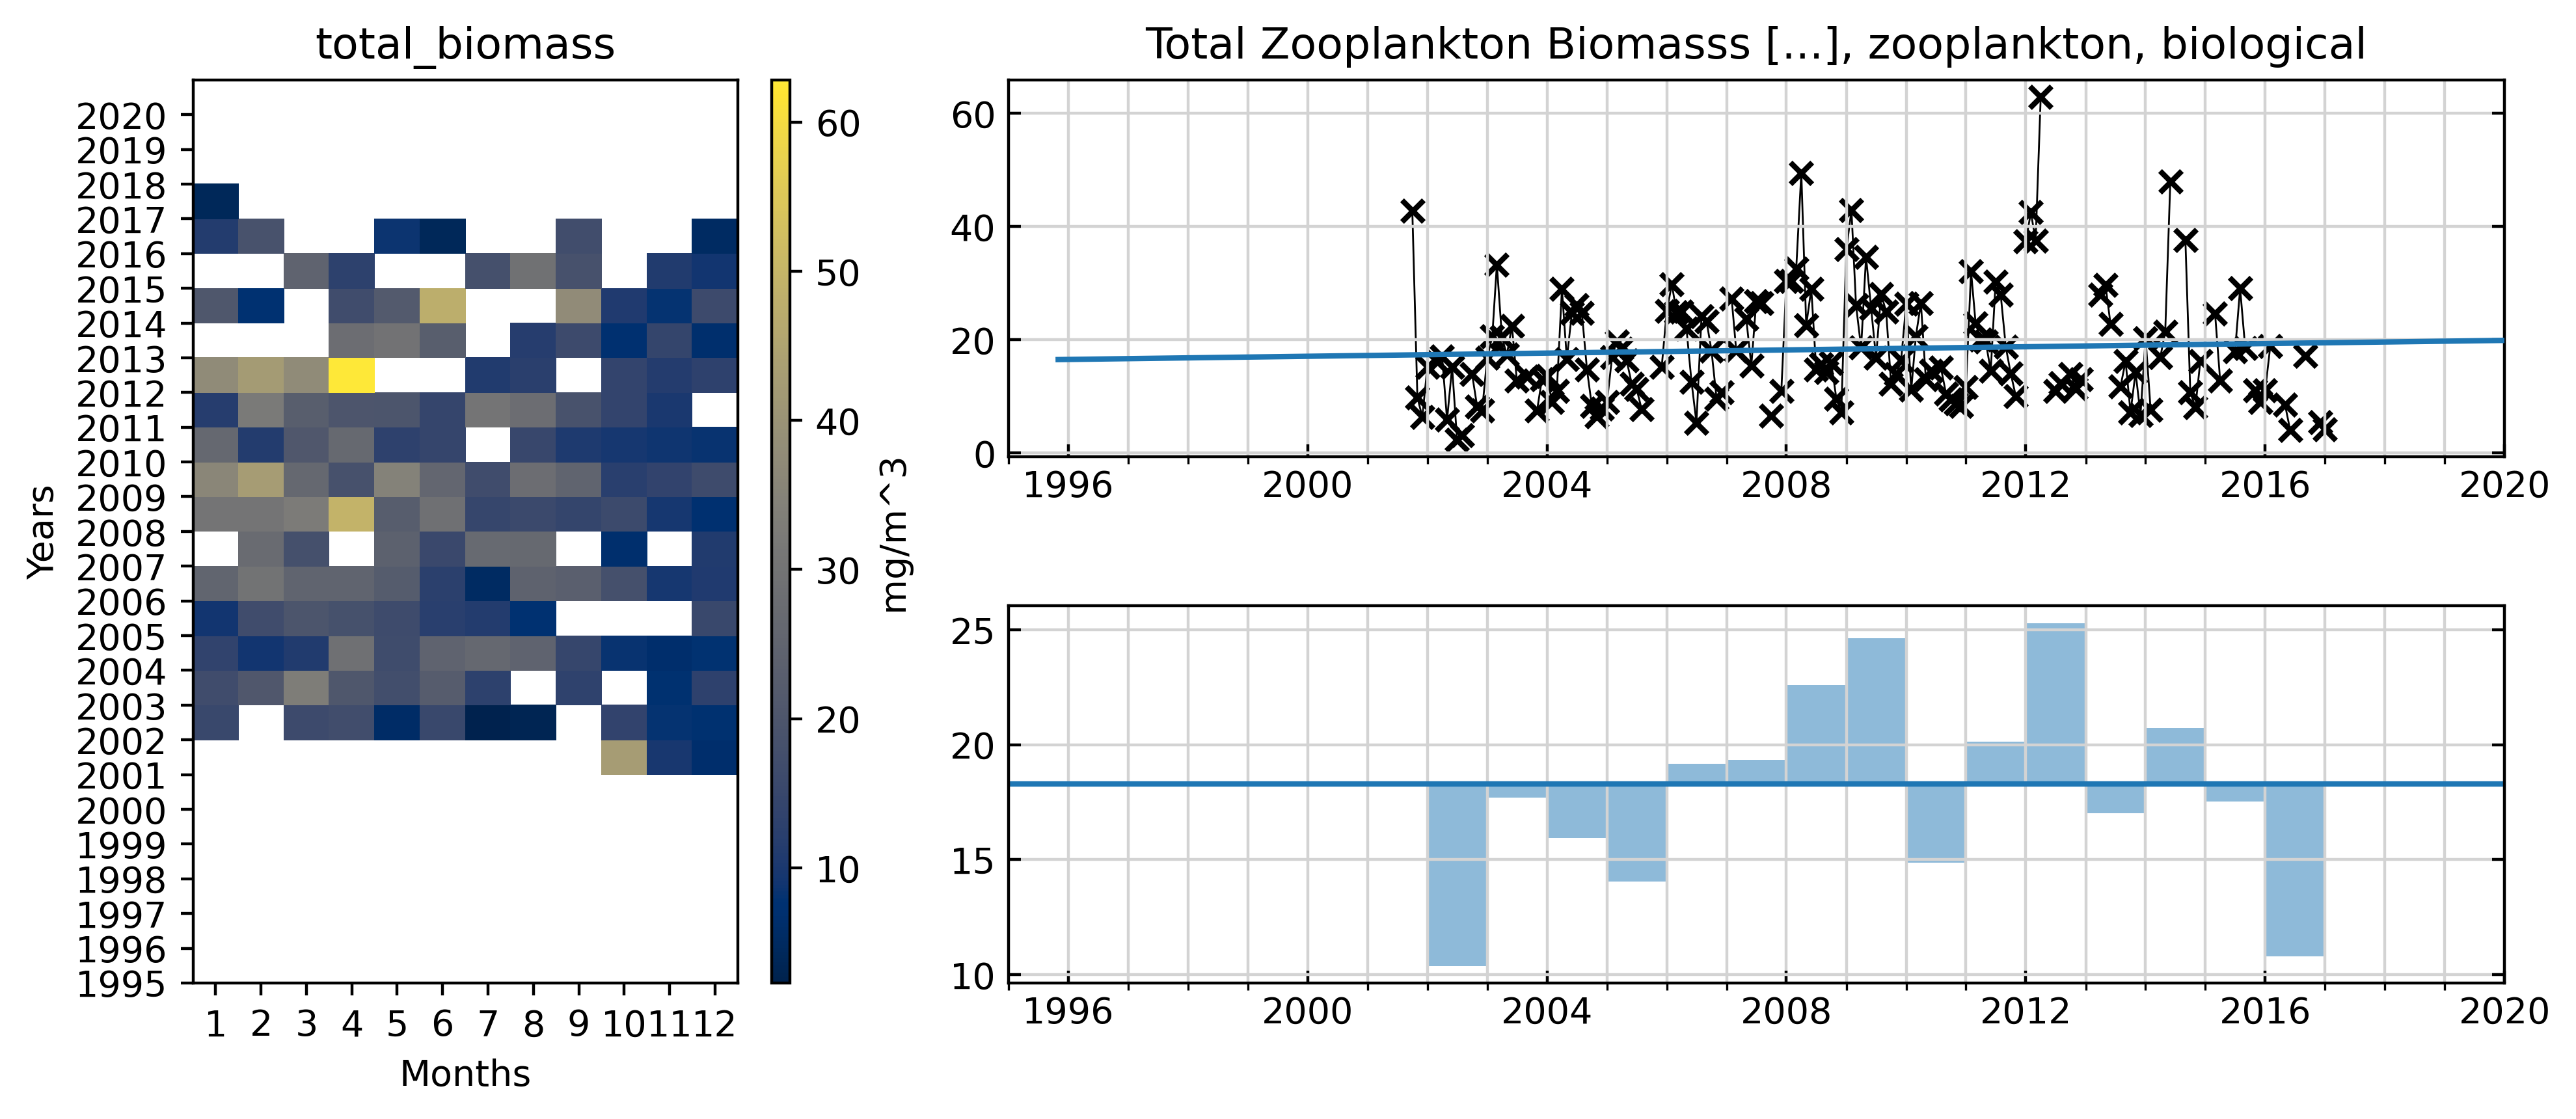

In [187]:
plotsingle3panelplot(CARIACO.total_biomass)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_ZOO_total_biomass.png")

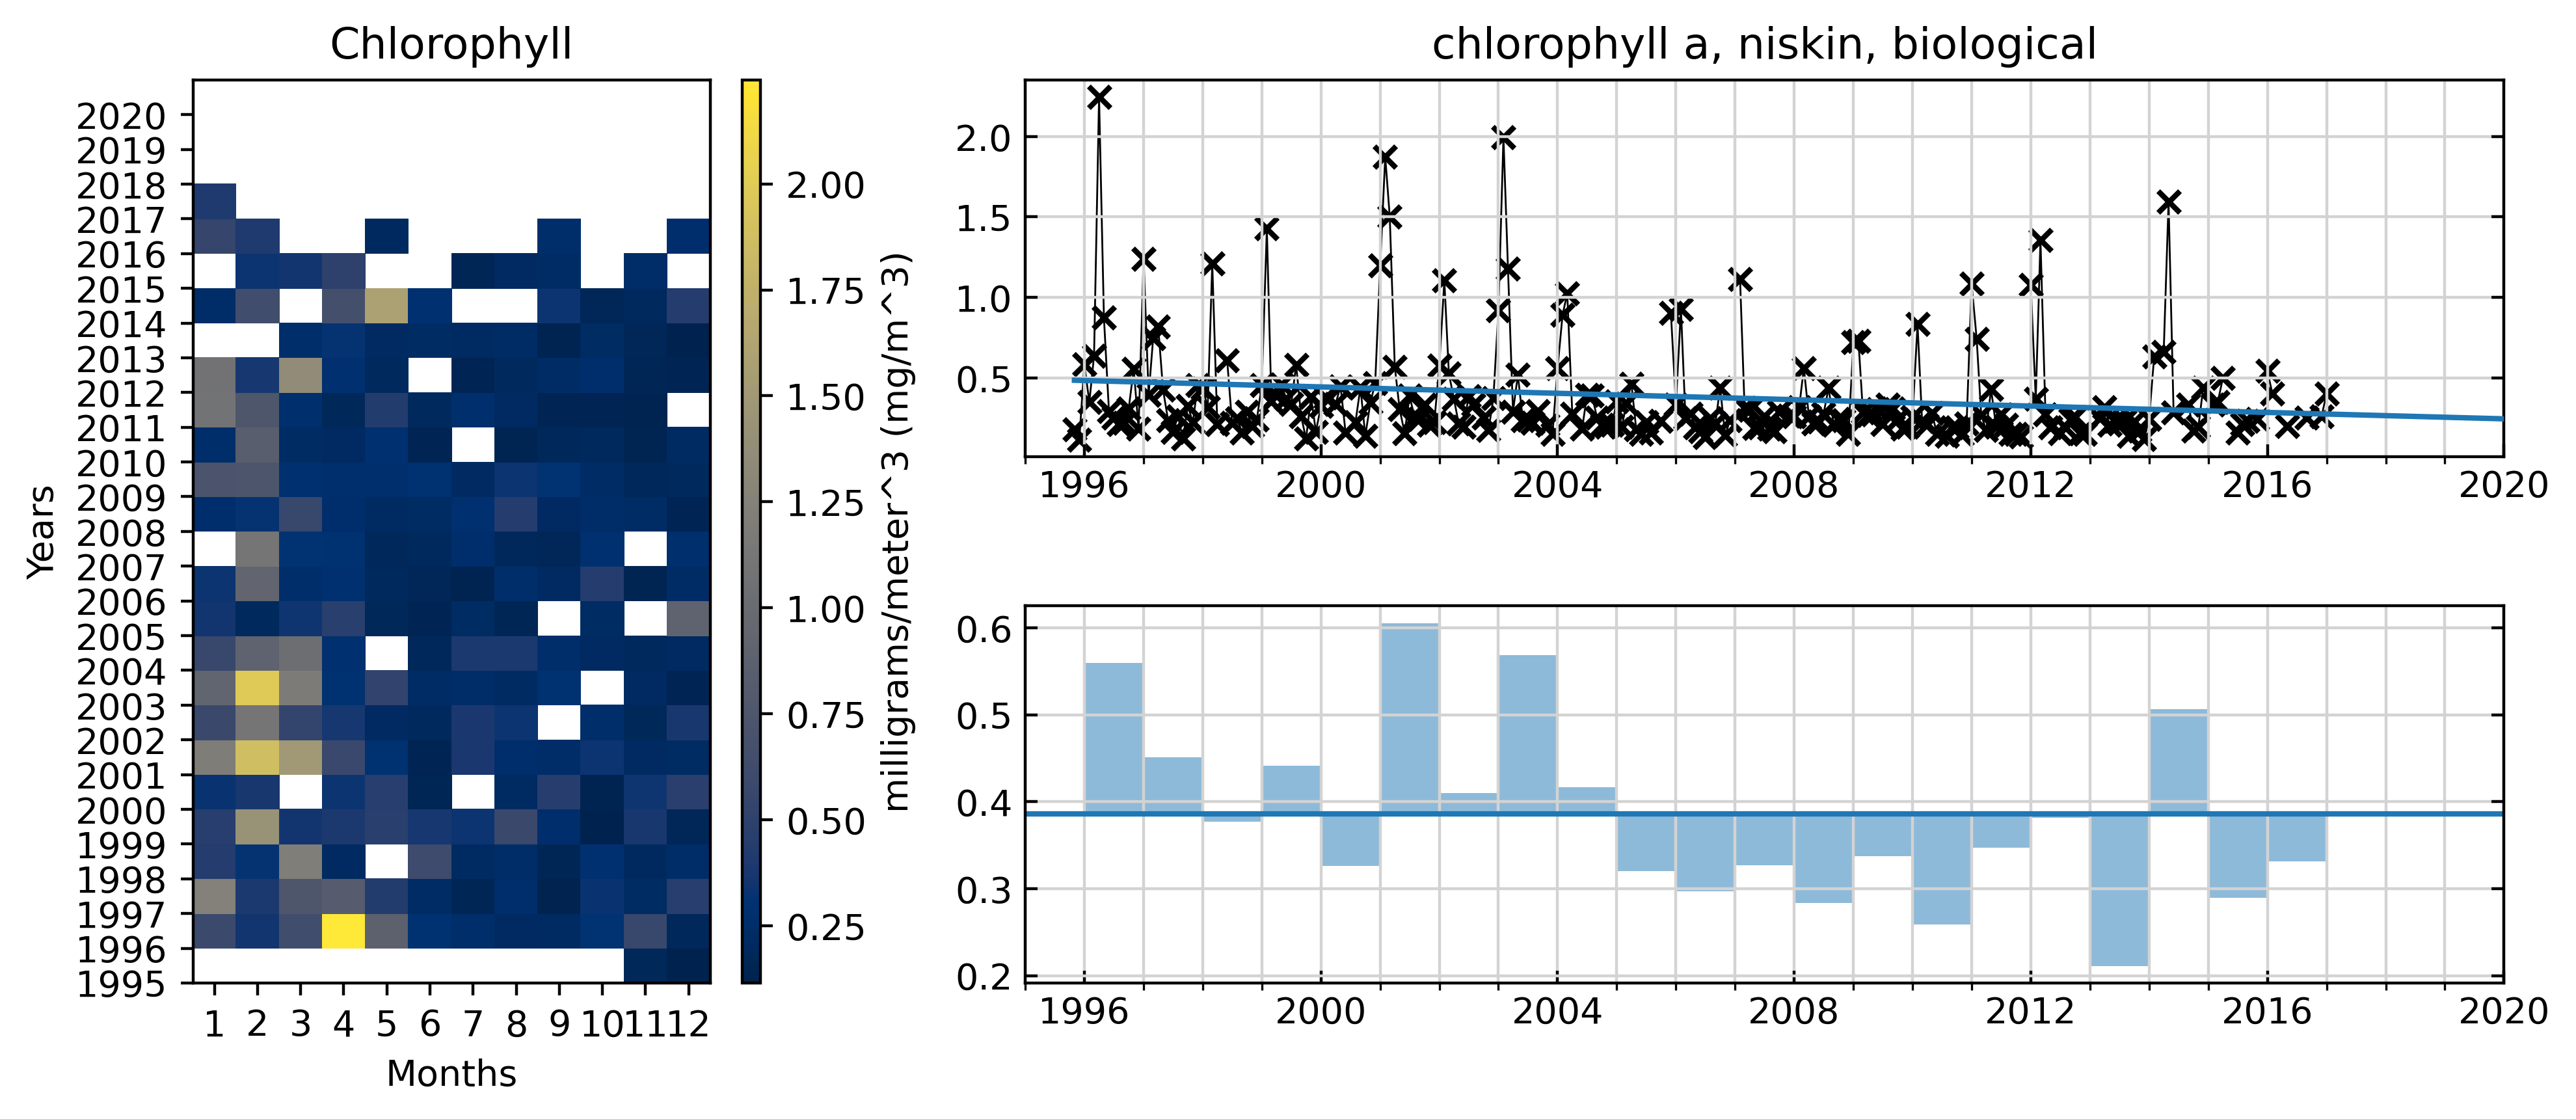

In [22]:
plotsingle3panelplot(CARIACO.Chlorophyll)
plt.savefig("PresentationPlots/TimeSeriesData/CARIACO_Chlorophyll.png")

# ERA5 DATA

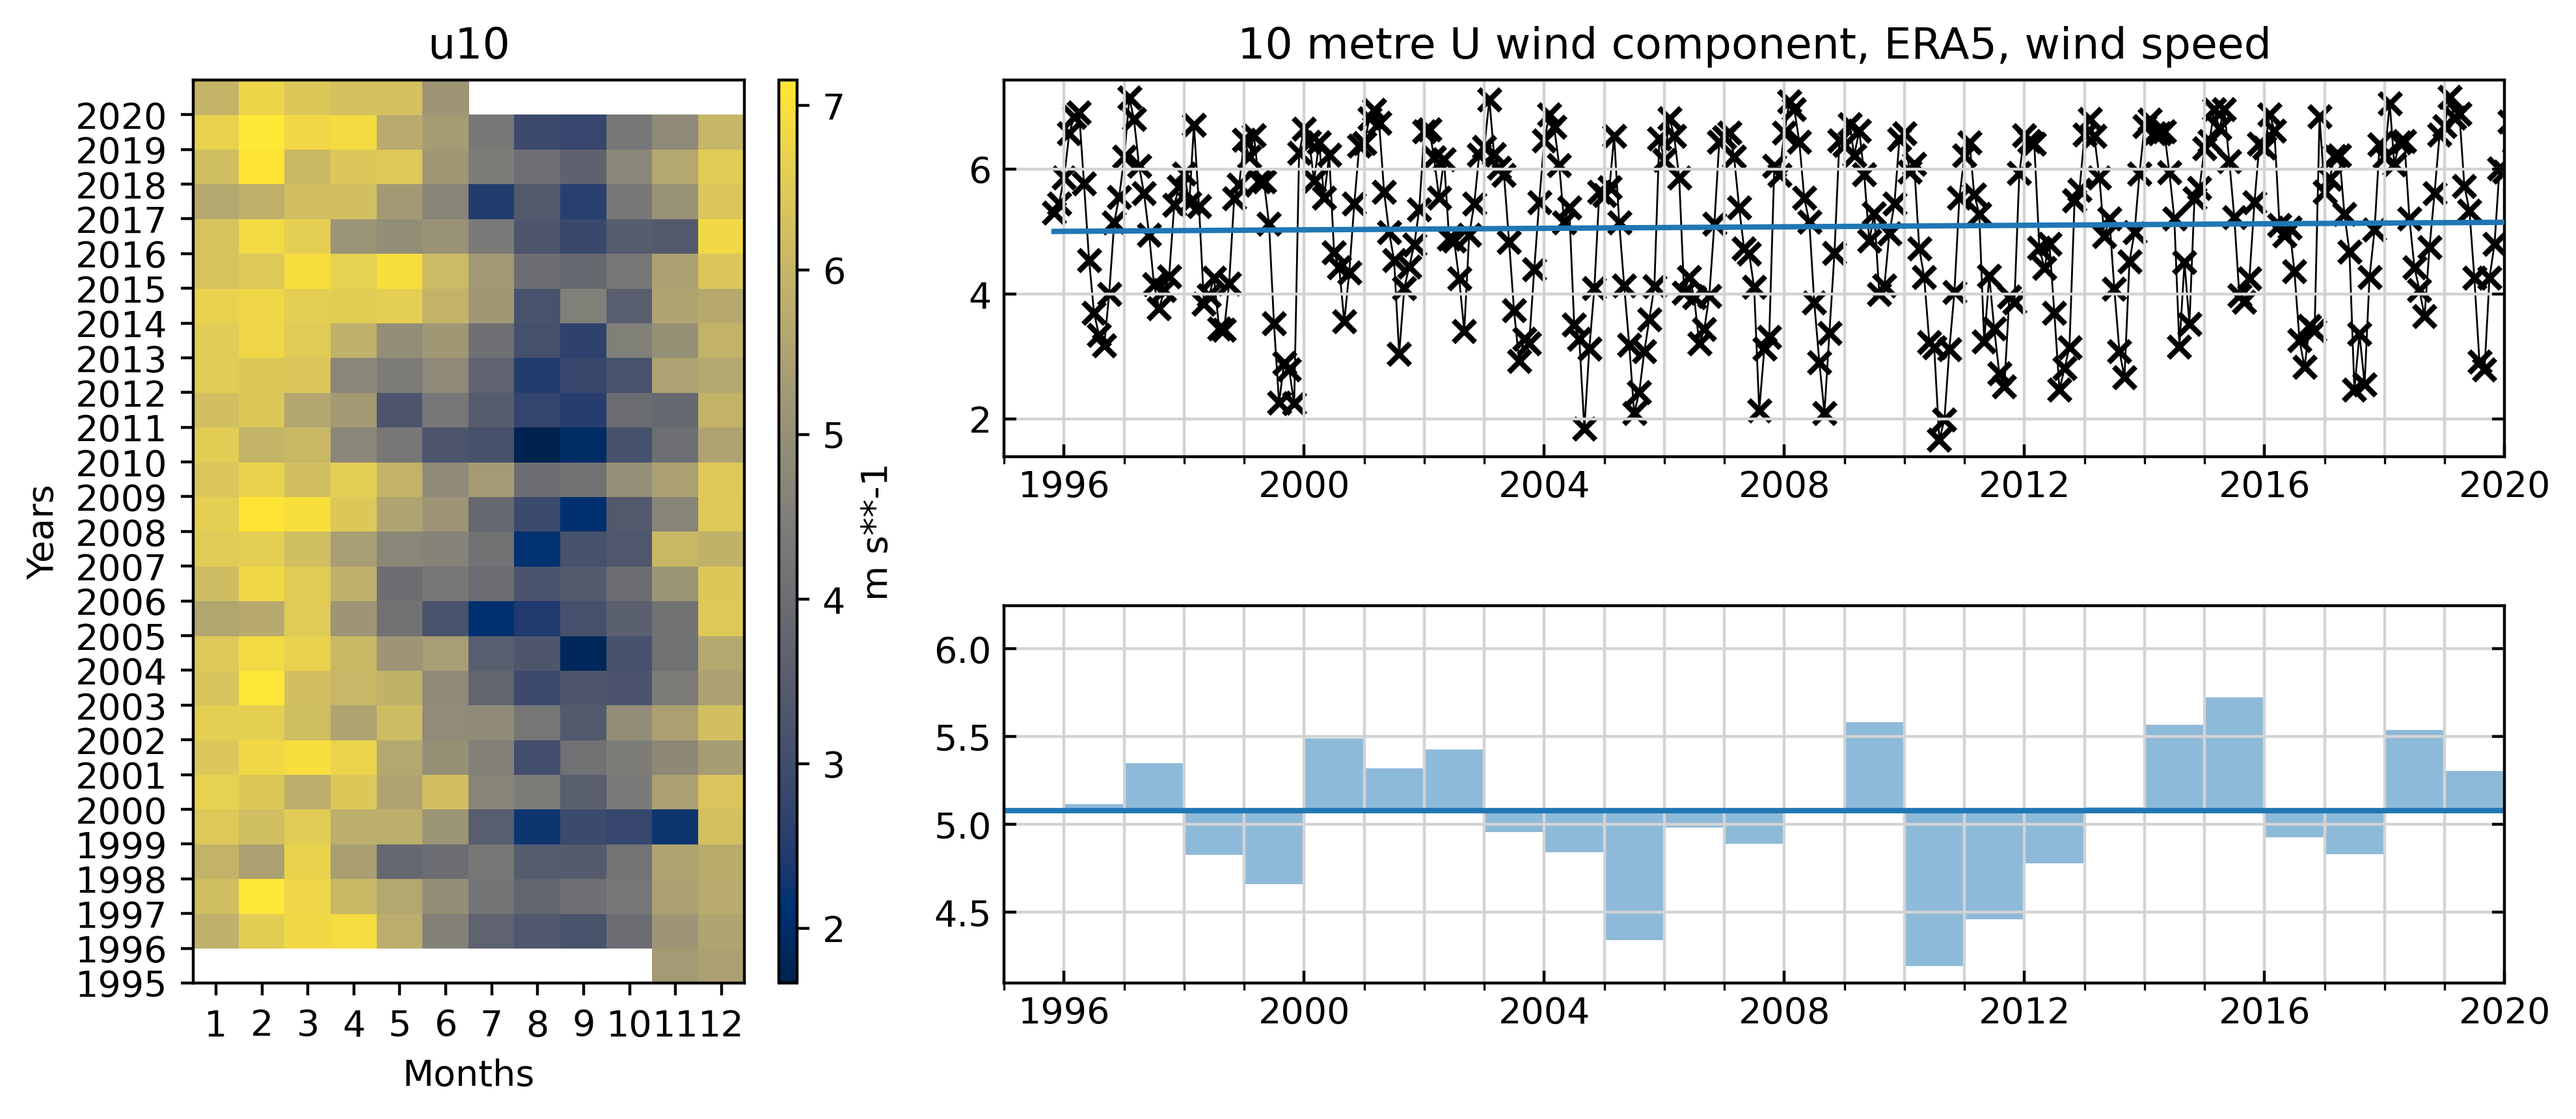

In [188]:
plotsingle3panelplot(-CARIACO.u10)
plt.savefig("PresentationPlots/ERA5/ERA5_u_comp_wind_negative.png")

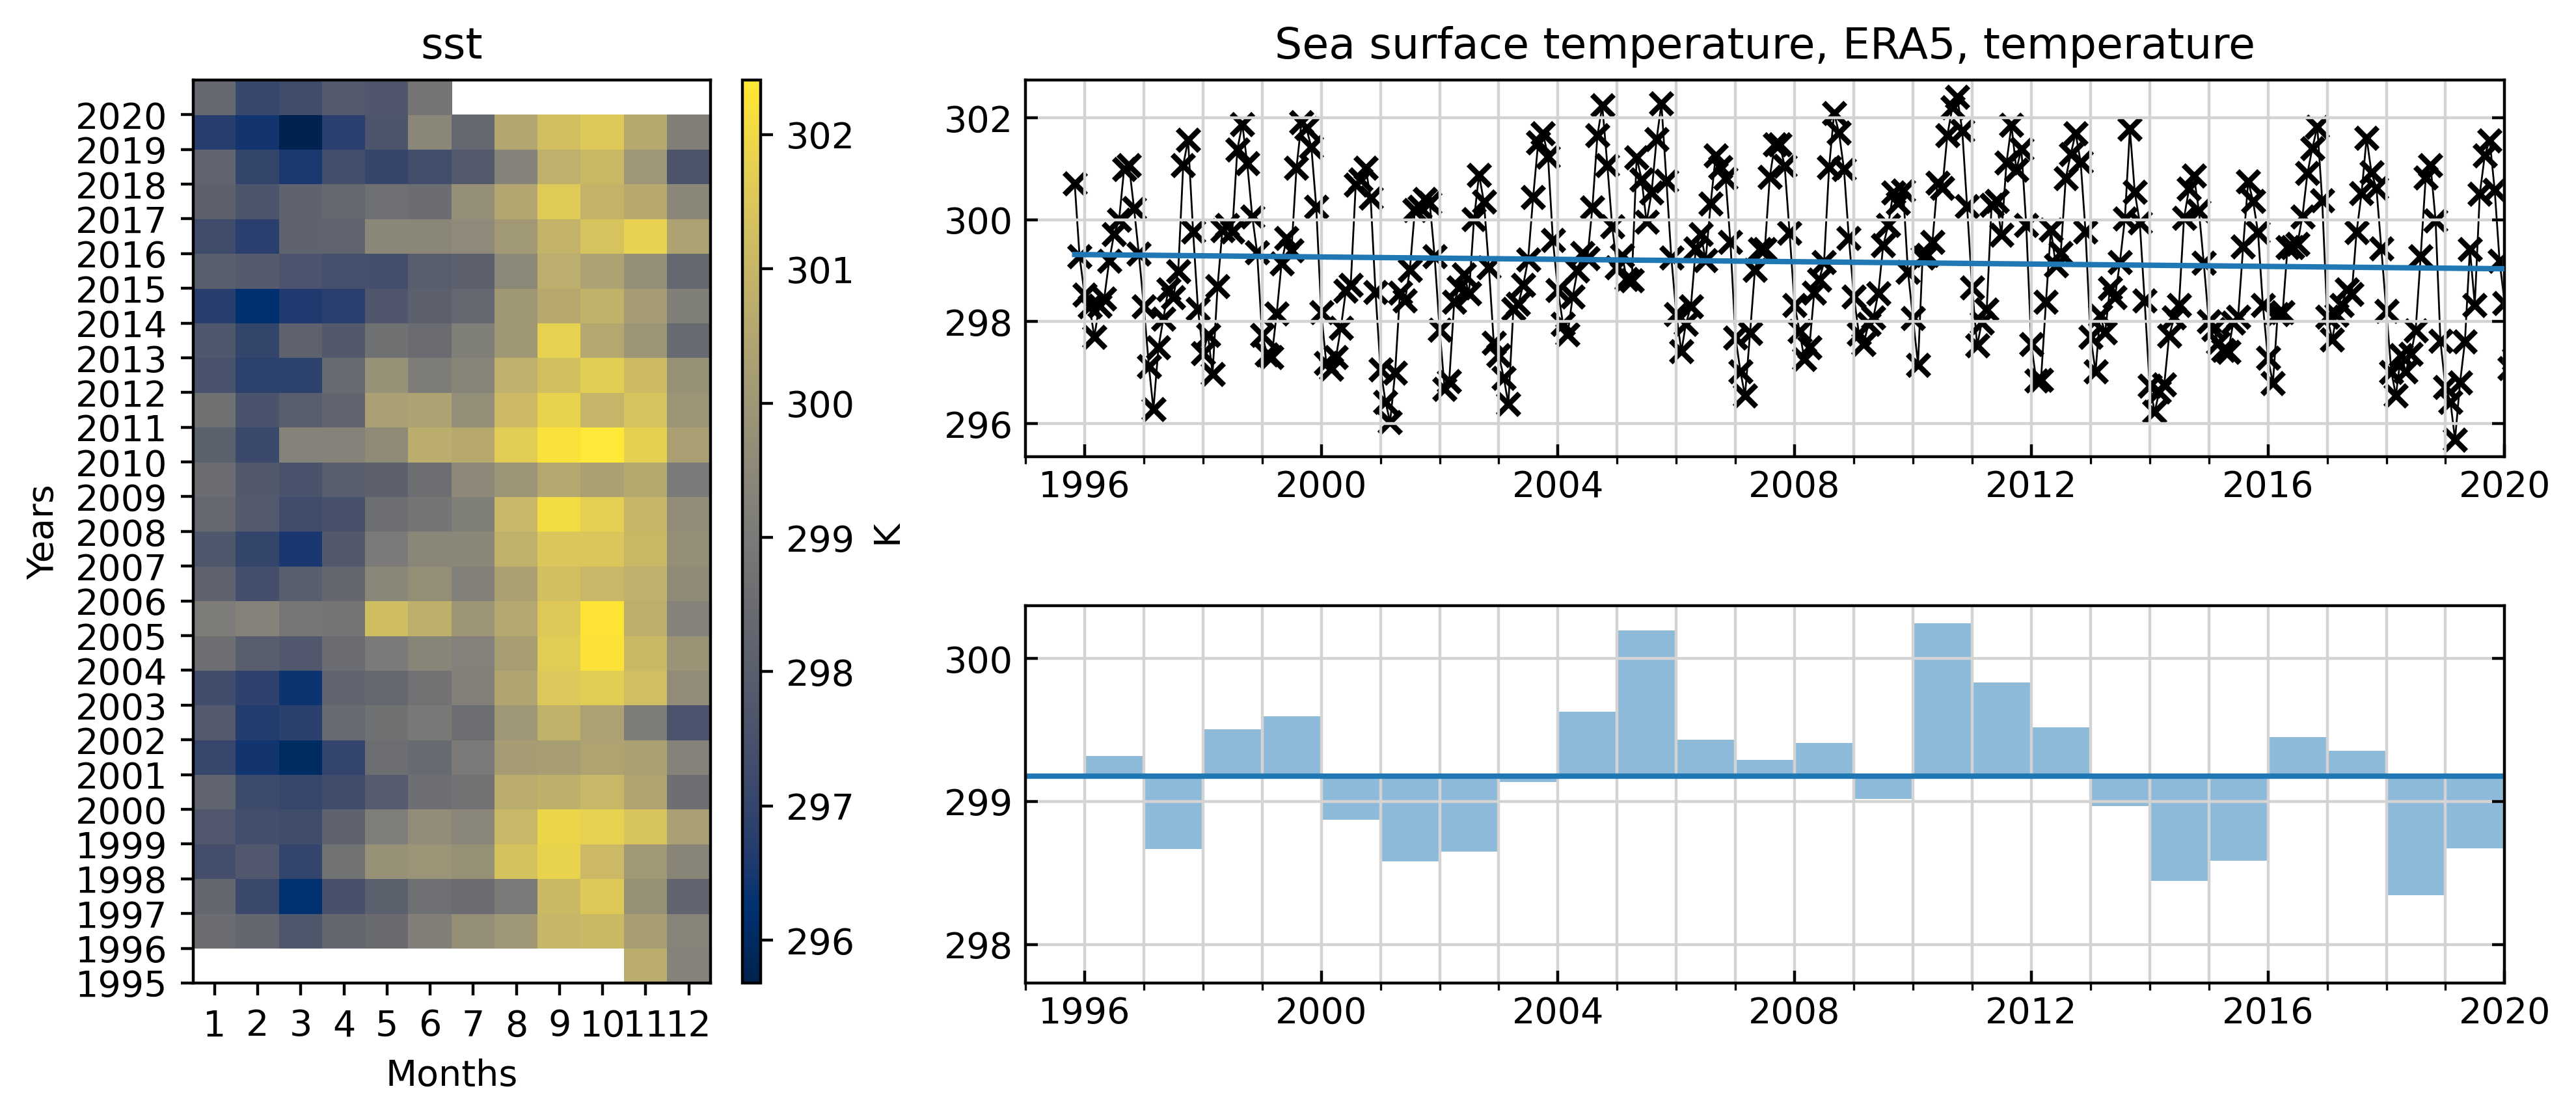

In [189]:
plotsingle3panelplot(CARIACO.sst)
plt.savefig("PresentationPlots/ERA5/ERA5_SST.png")

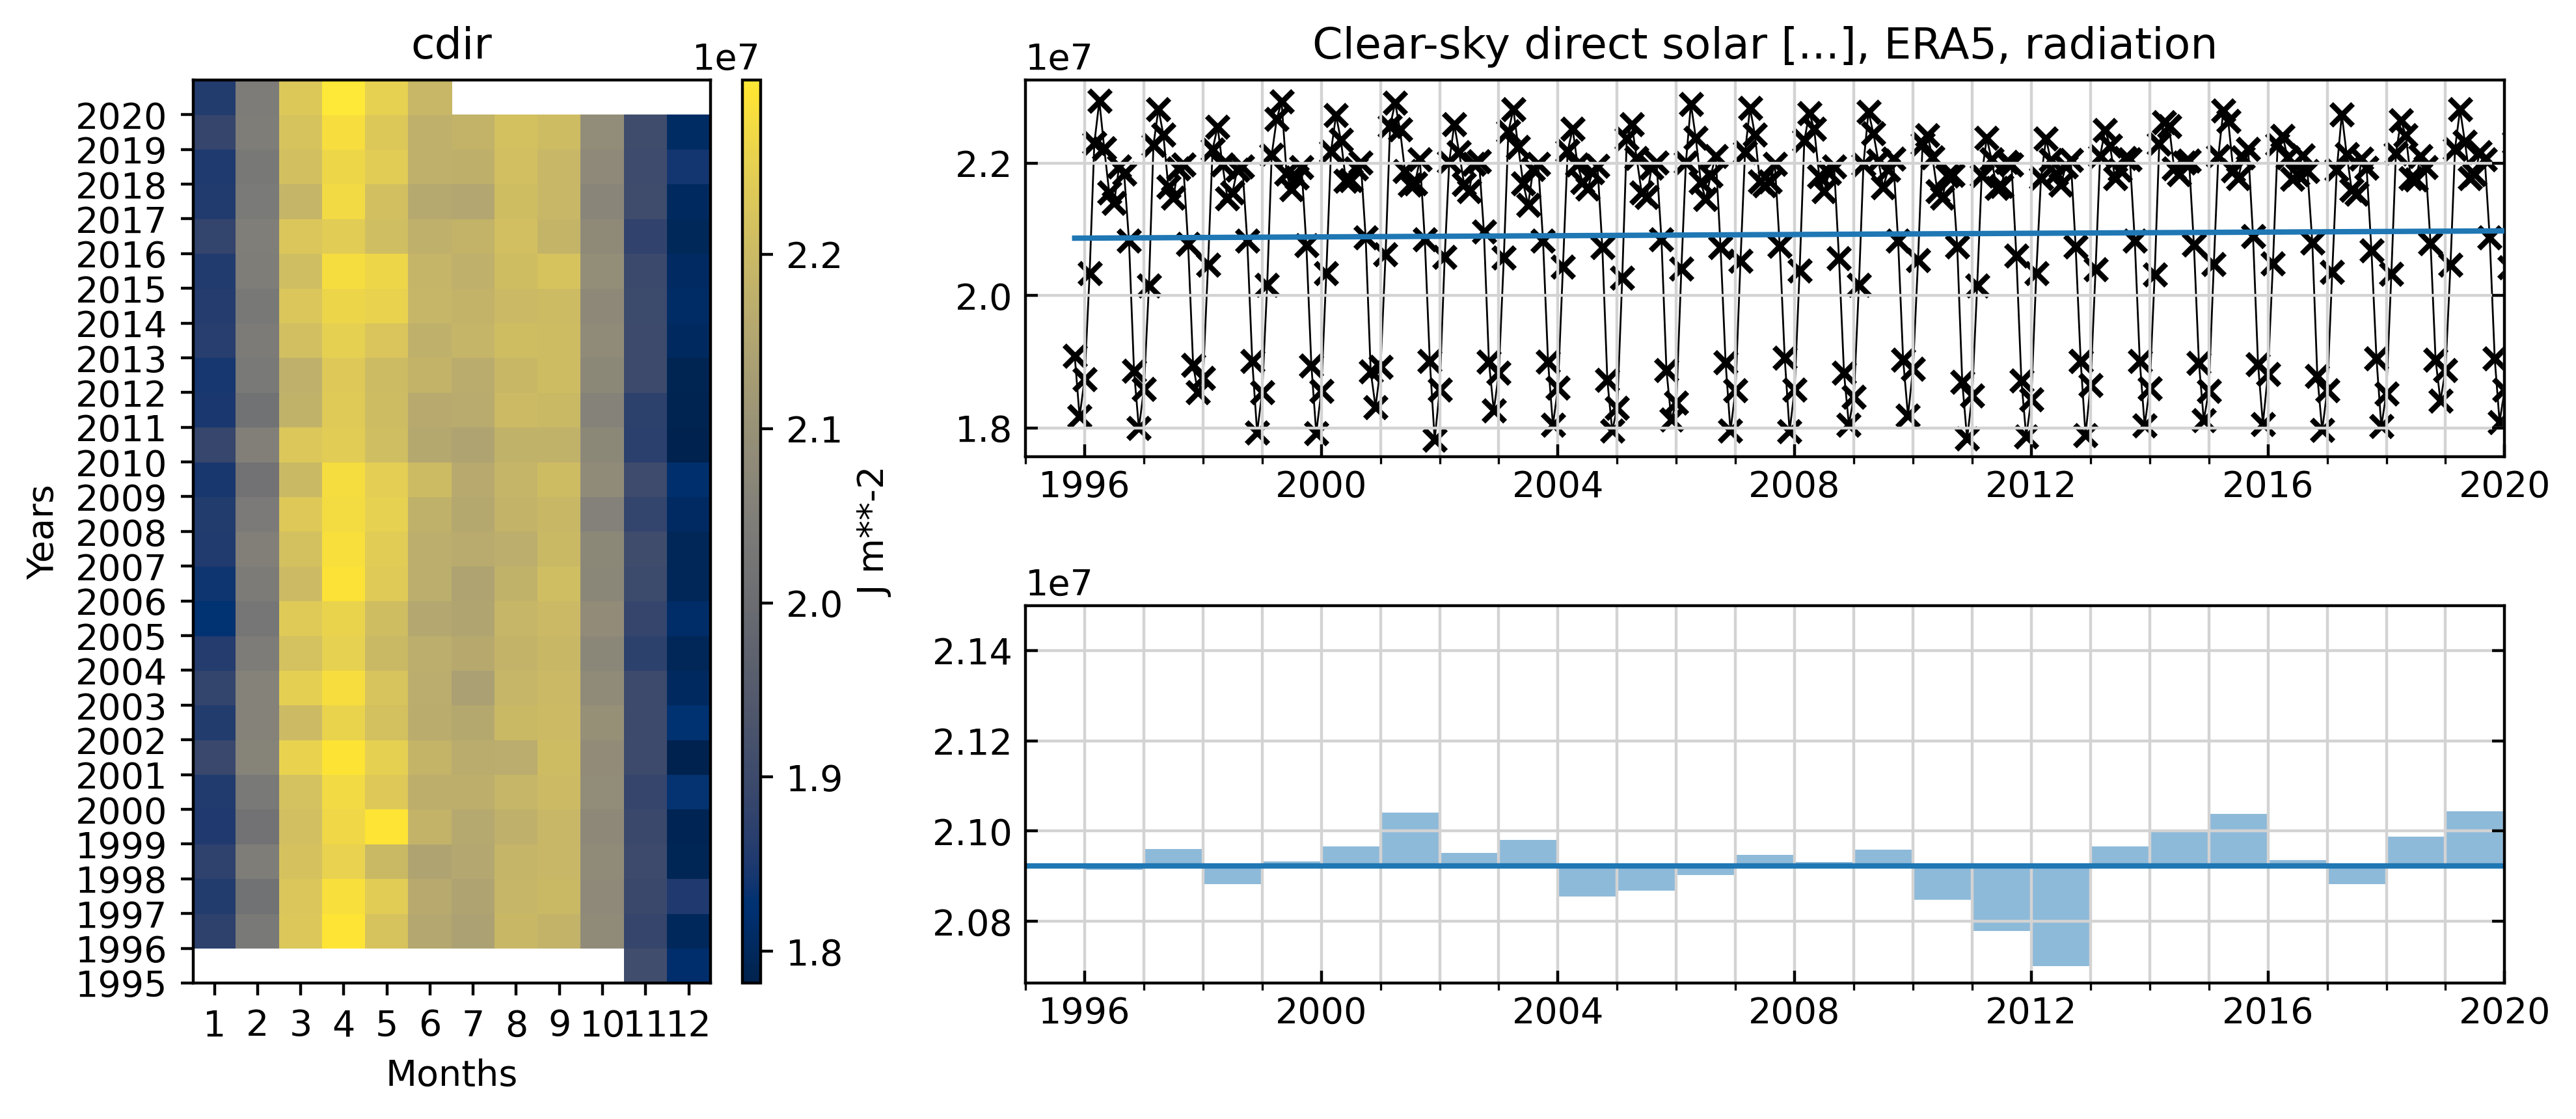

In [190]:
plotsingle3panelplot(CARIACO.cdir)
plt.savefig("PresentationPlots/ERA5/ERA5_irradiance.png")

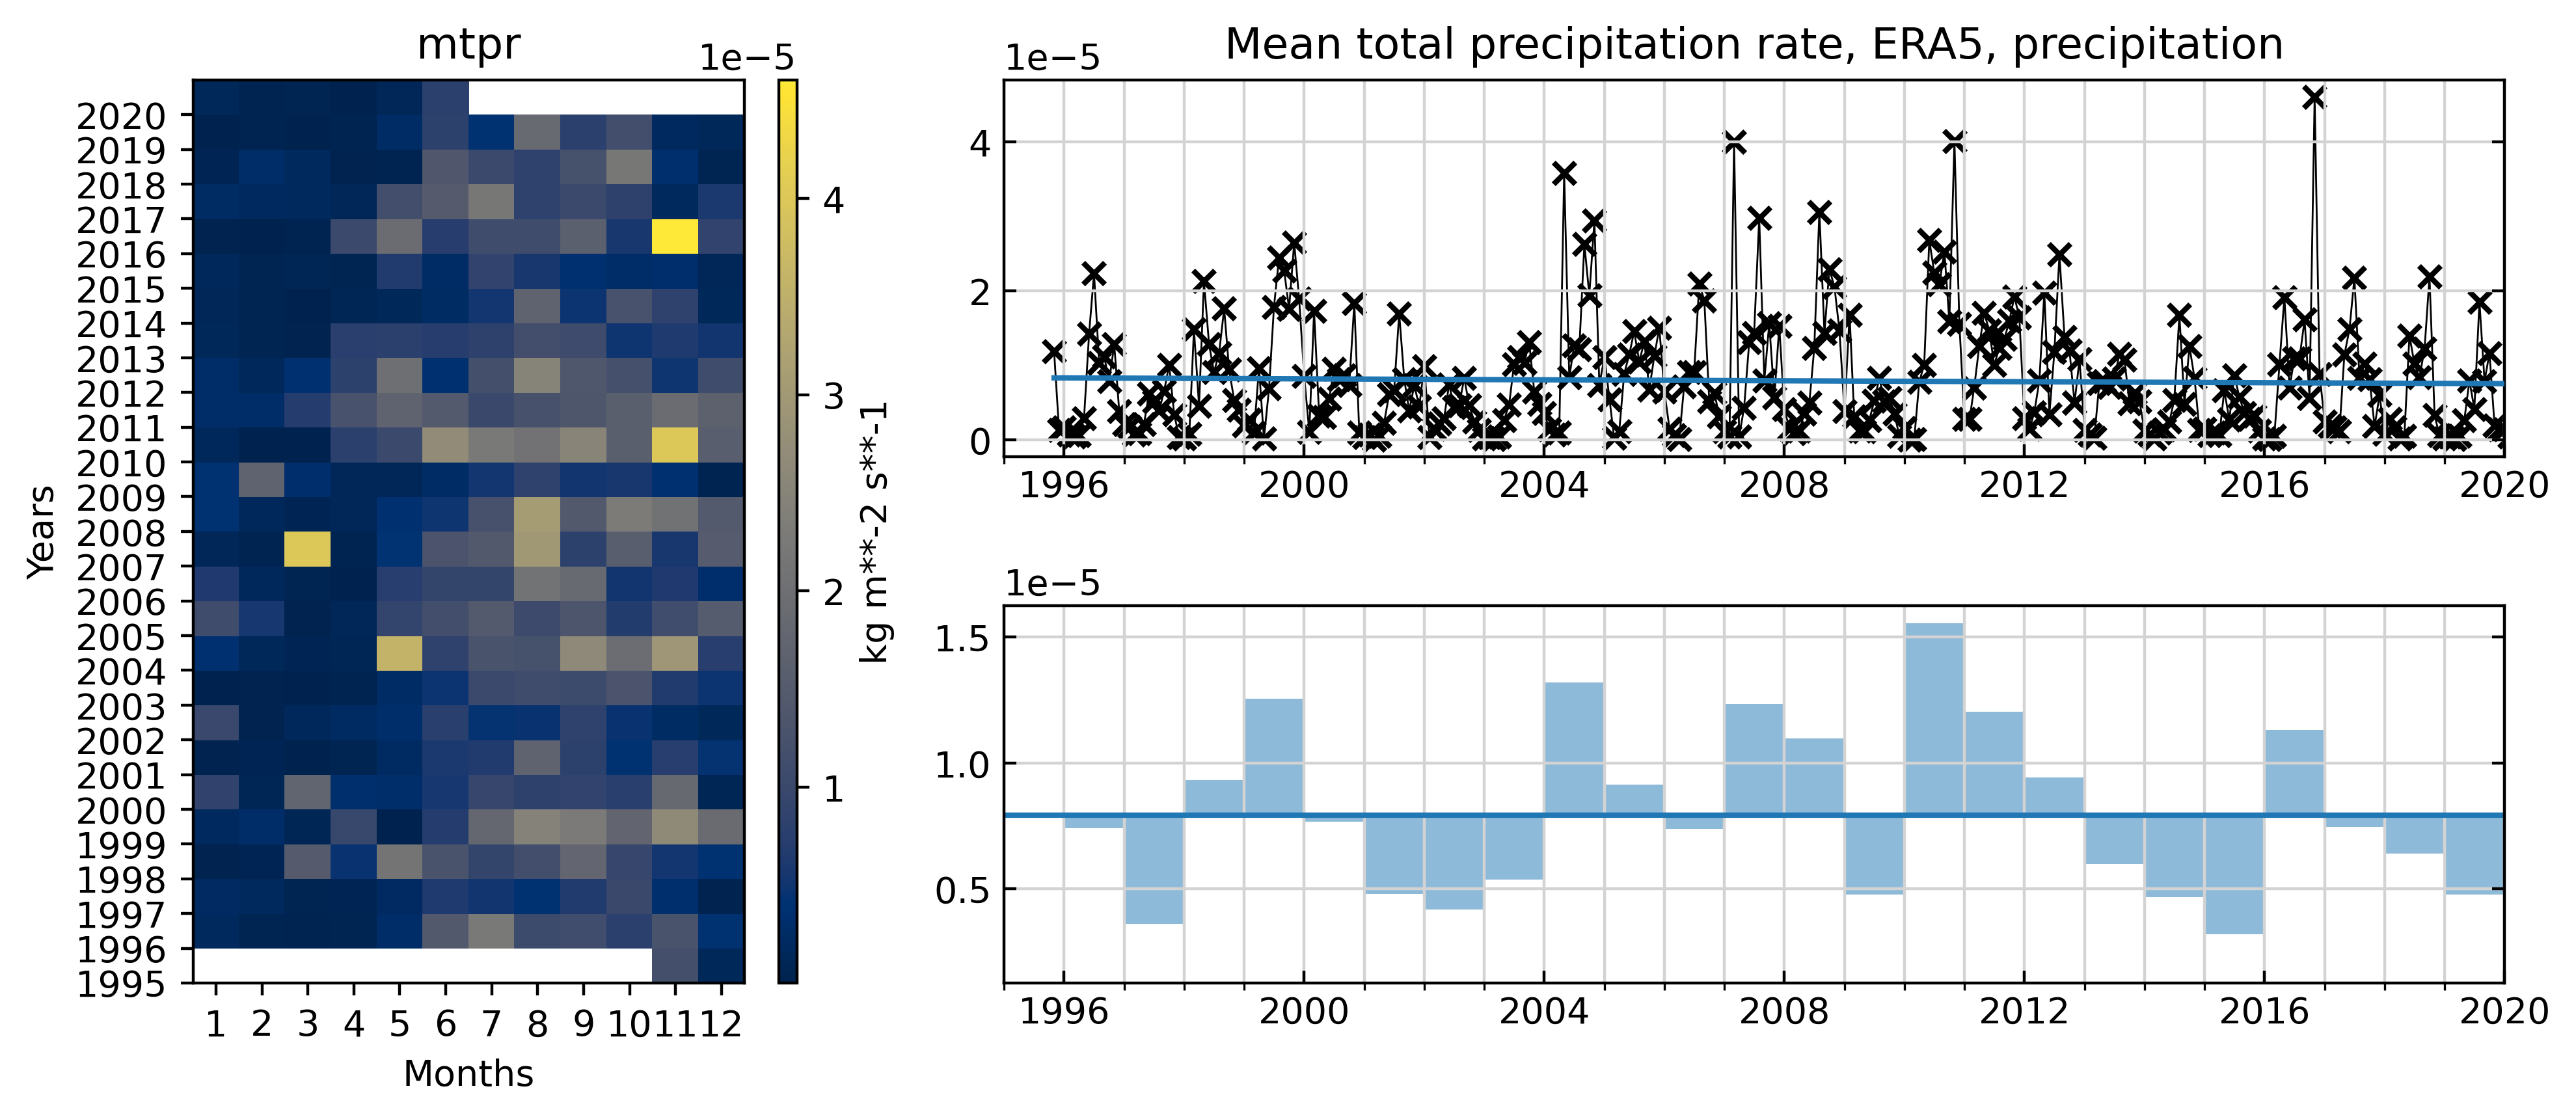

In [191]:
plotsingle3panelplot(CARIACO.mtpr)
plt.savefig("PresentationPlots/ERA5/ERA5_meantotalprecipitation.png")

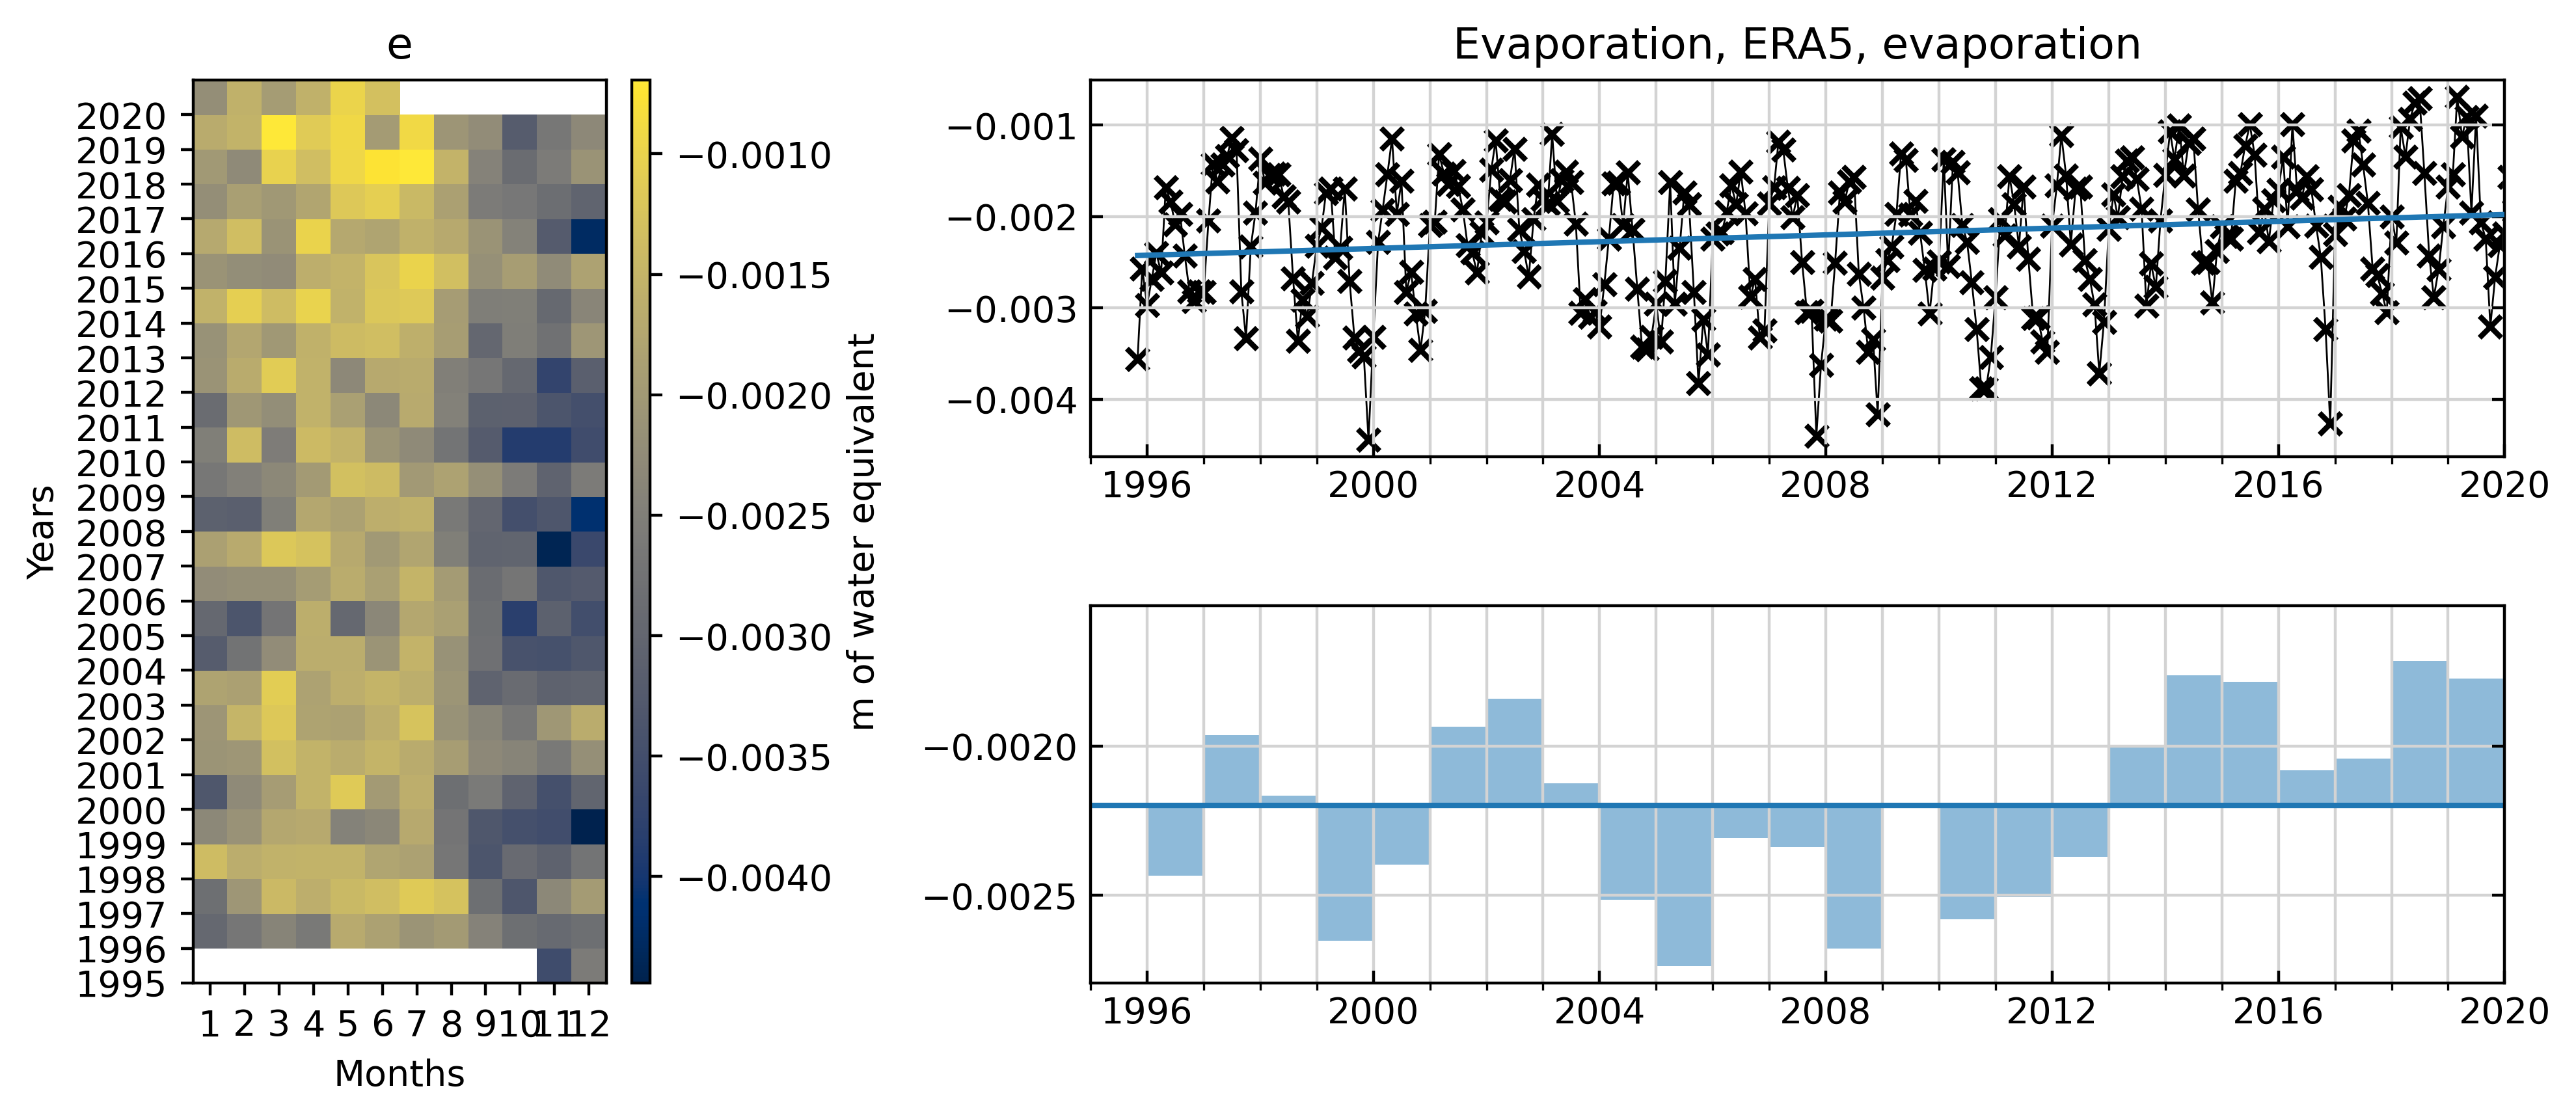

In [21]:
plotsingle3panelplot(CARIACO.e)
plt.savefig("PresentationPlots/ERA5/ERA5_evaporation.png")

# Satellite DATA

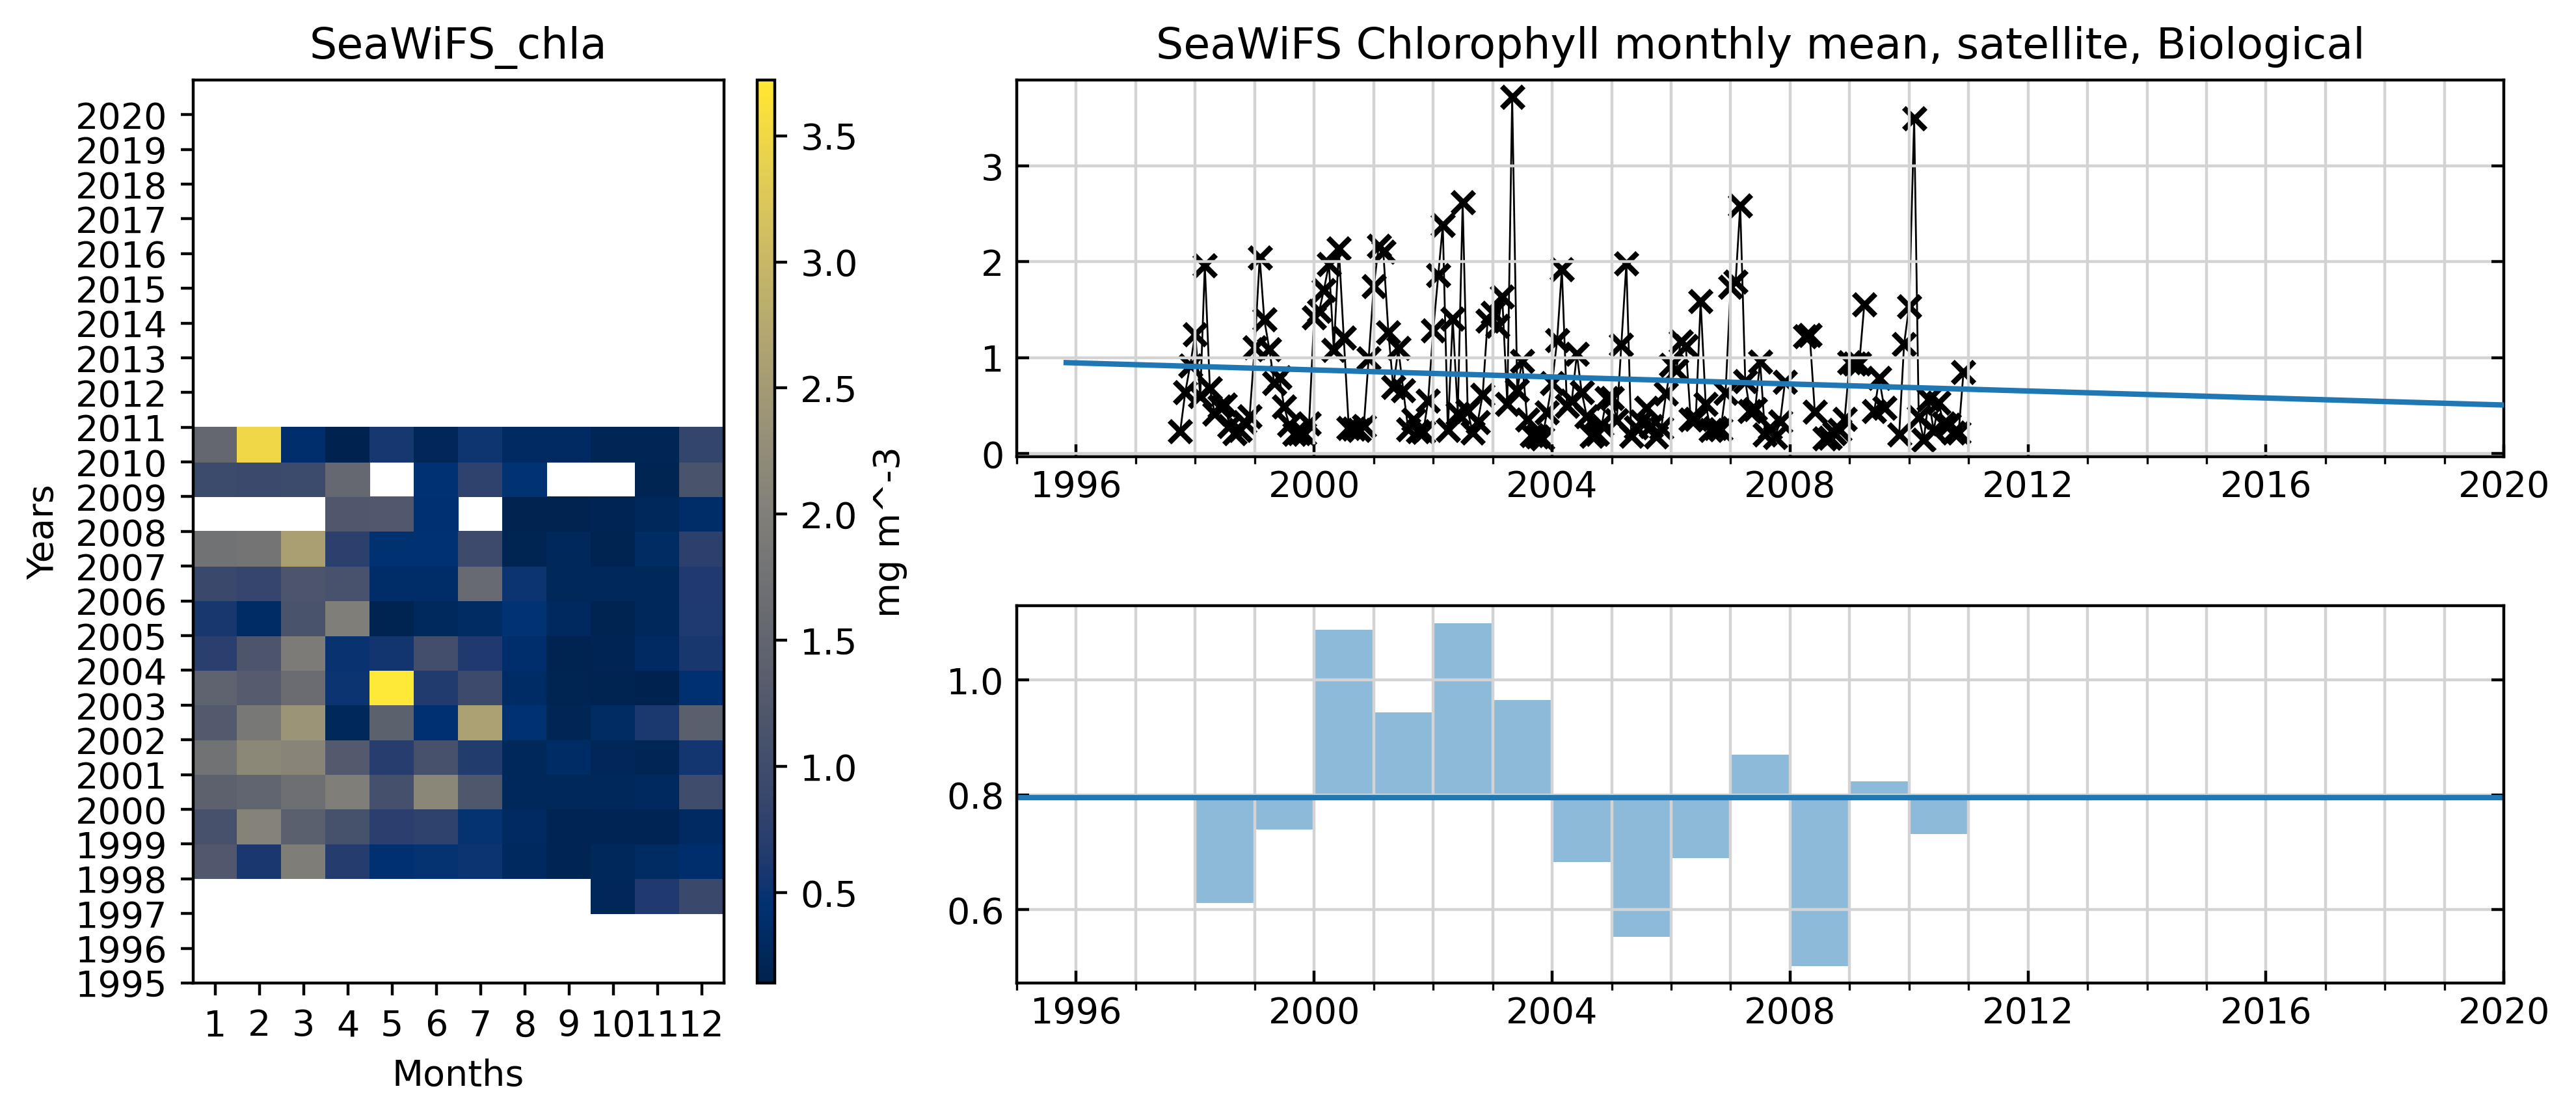

In [18]:
plotsingle3panelplot(CARIACO.SeaWiFS_chla)
plt.savefig("PresentationPlots/Satellite/Satellite_SeaWiFS_chla.png")

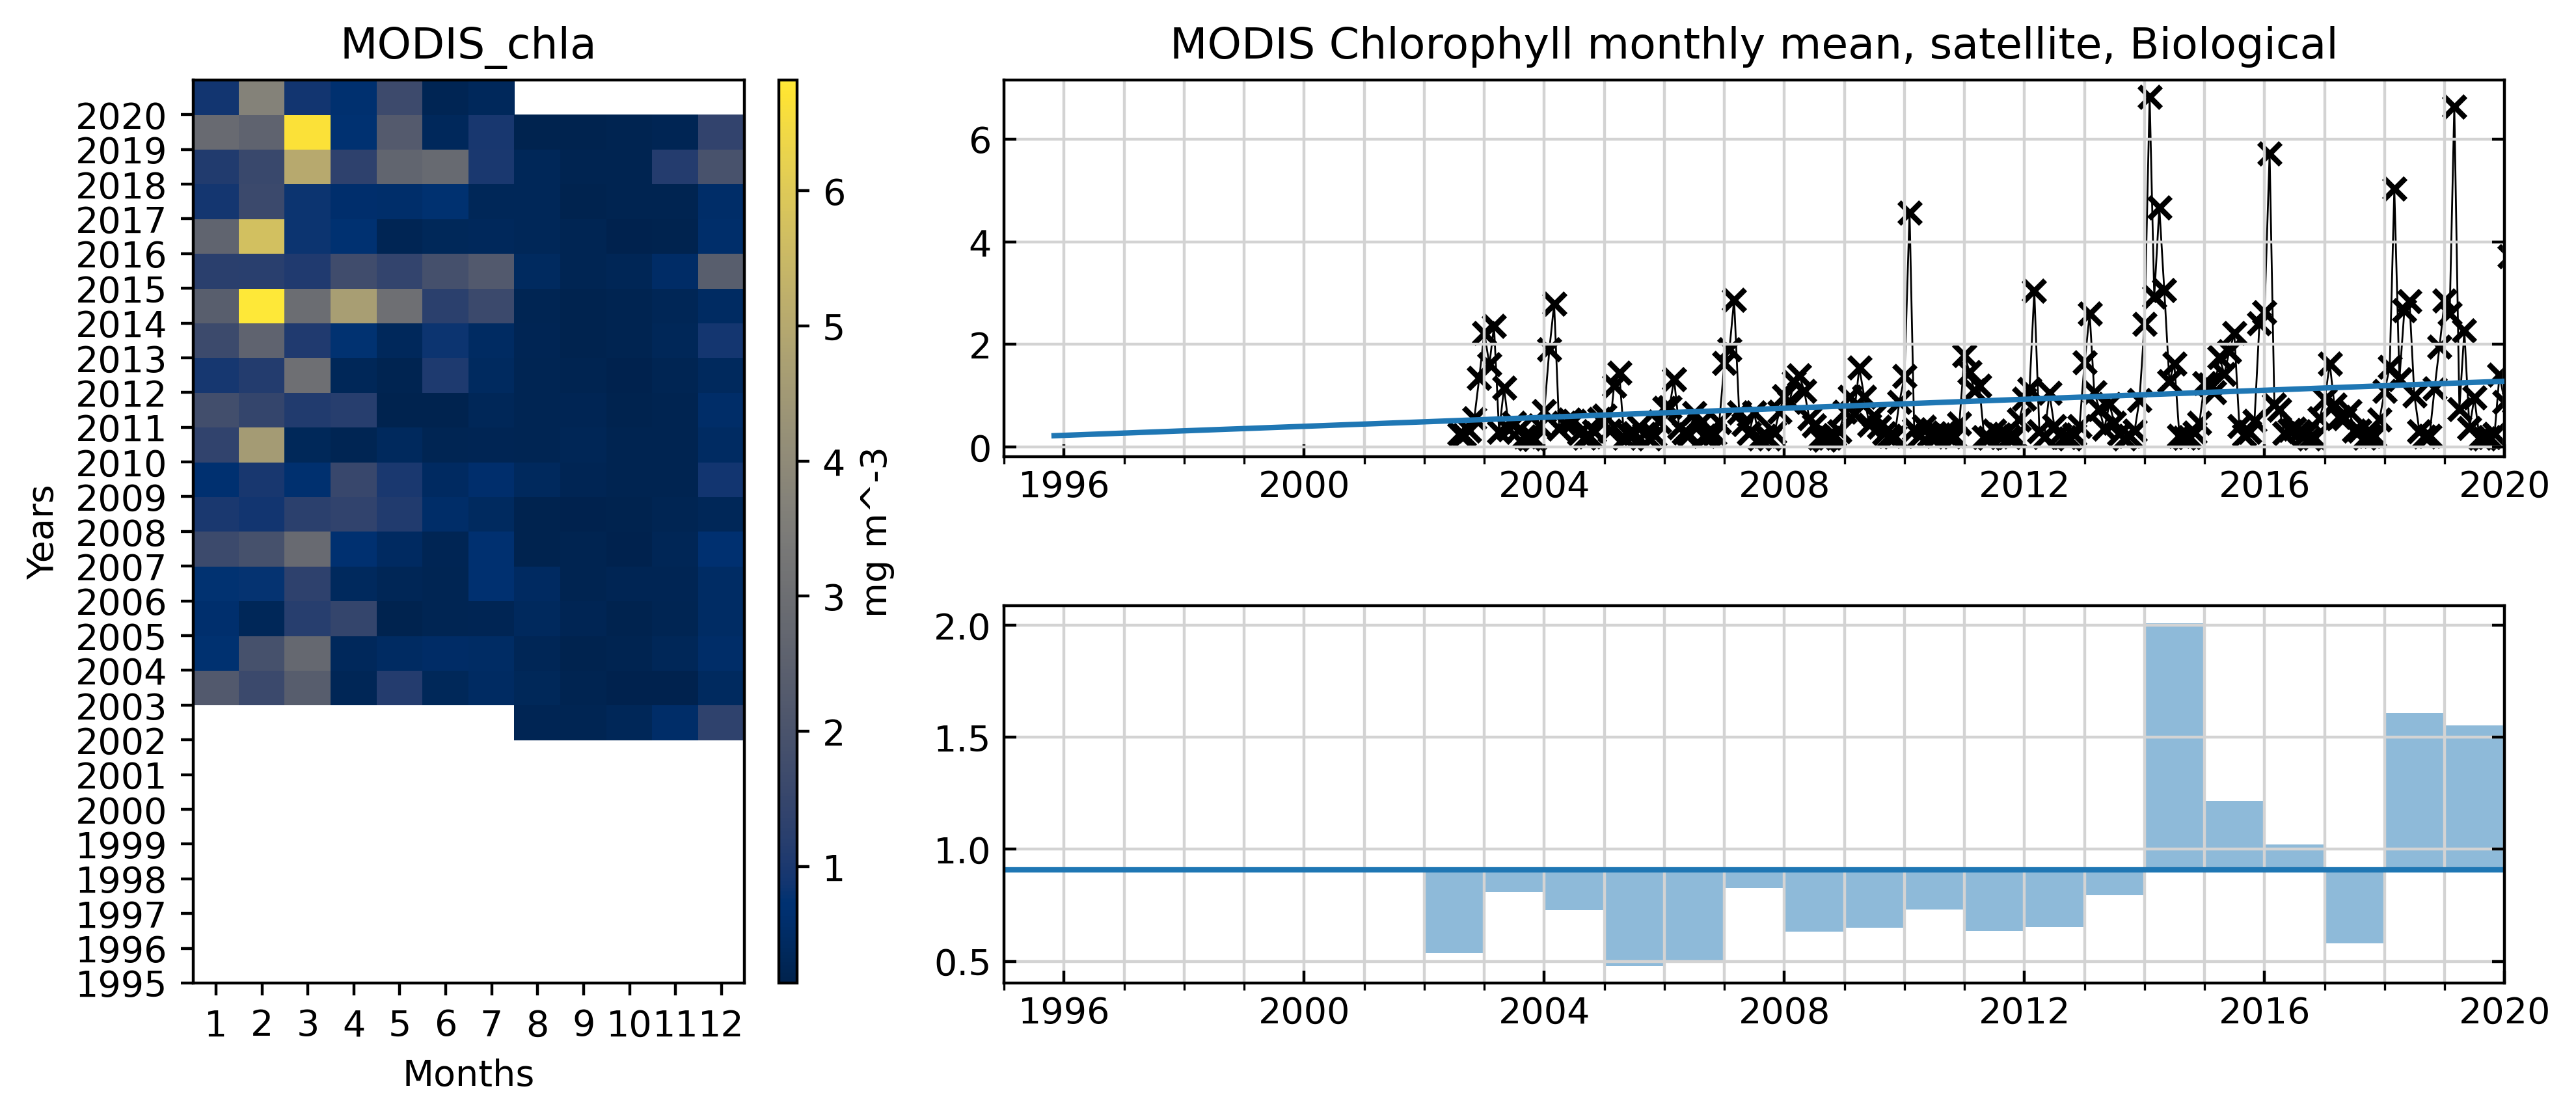

In [19]:
plotsingle3panelplot(CARIACO.MODIS_chla)
plt.savefig("PresentationPlots/Satellite/Satellite_SeaWiFS_chla.png")

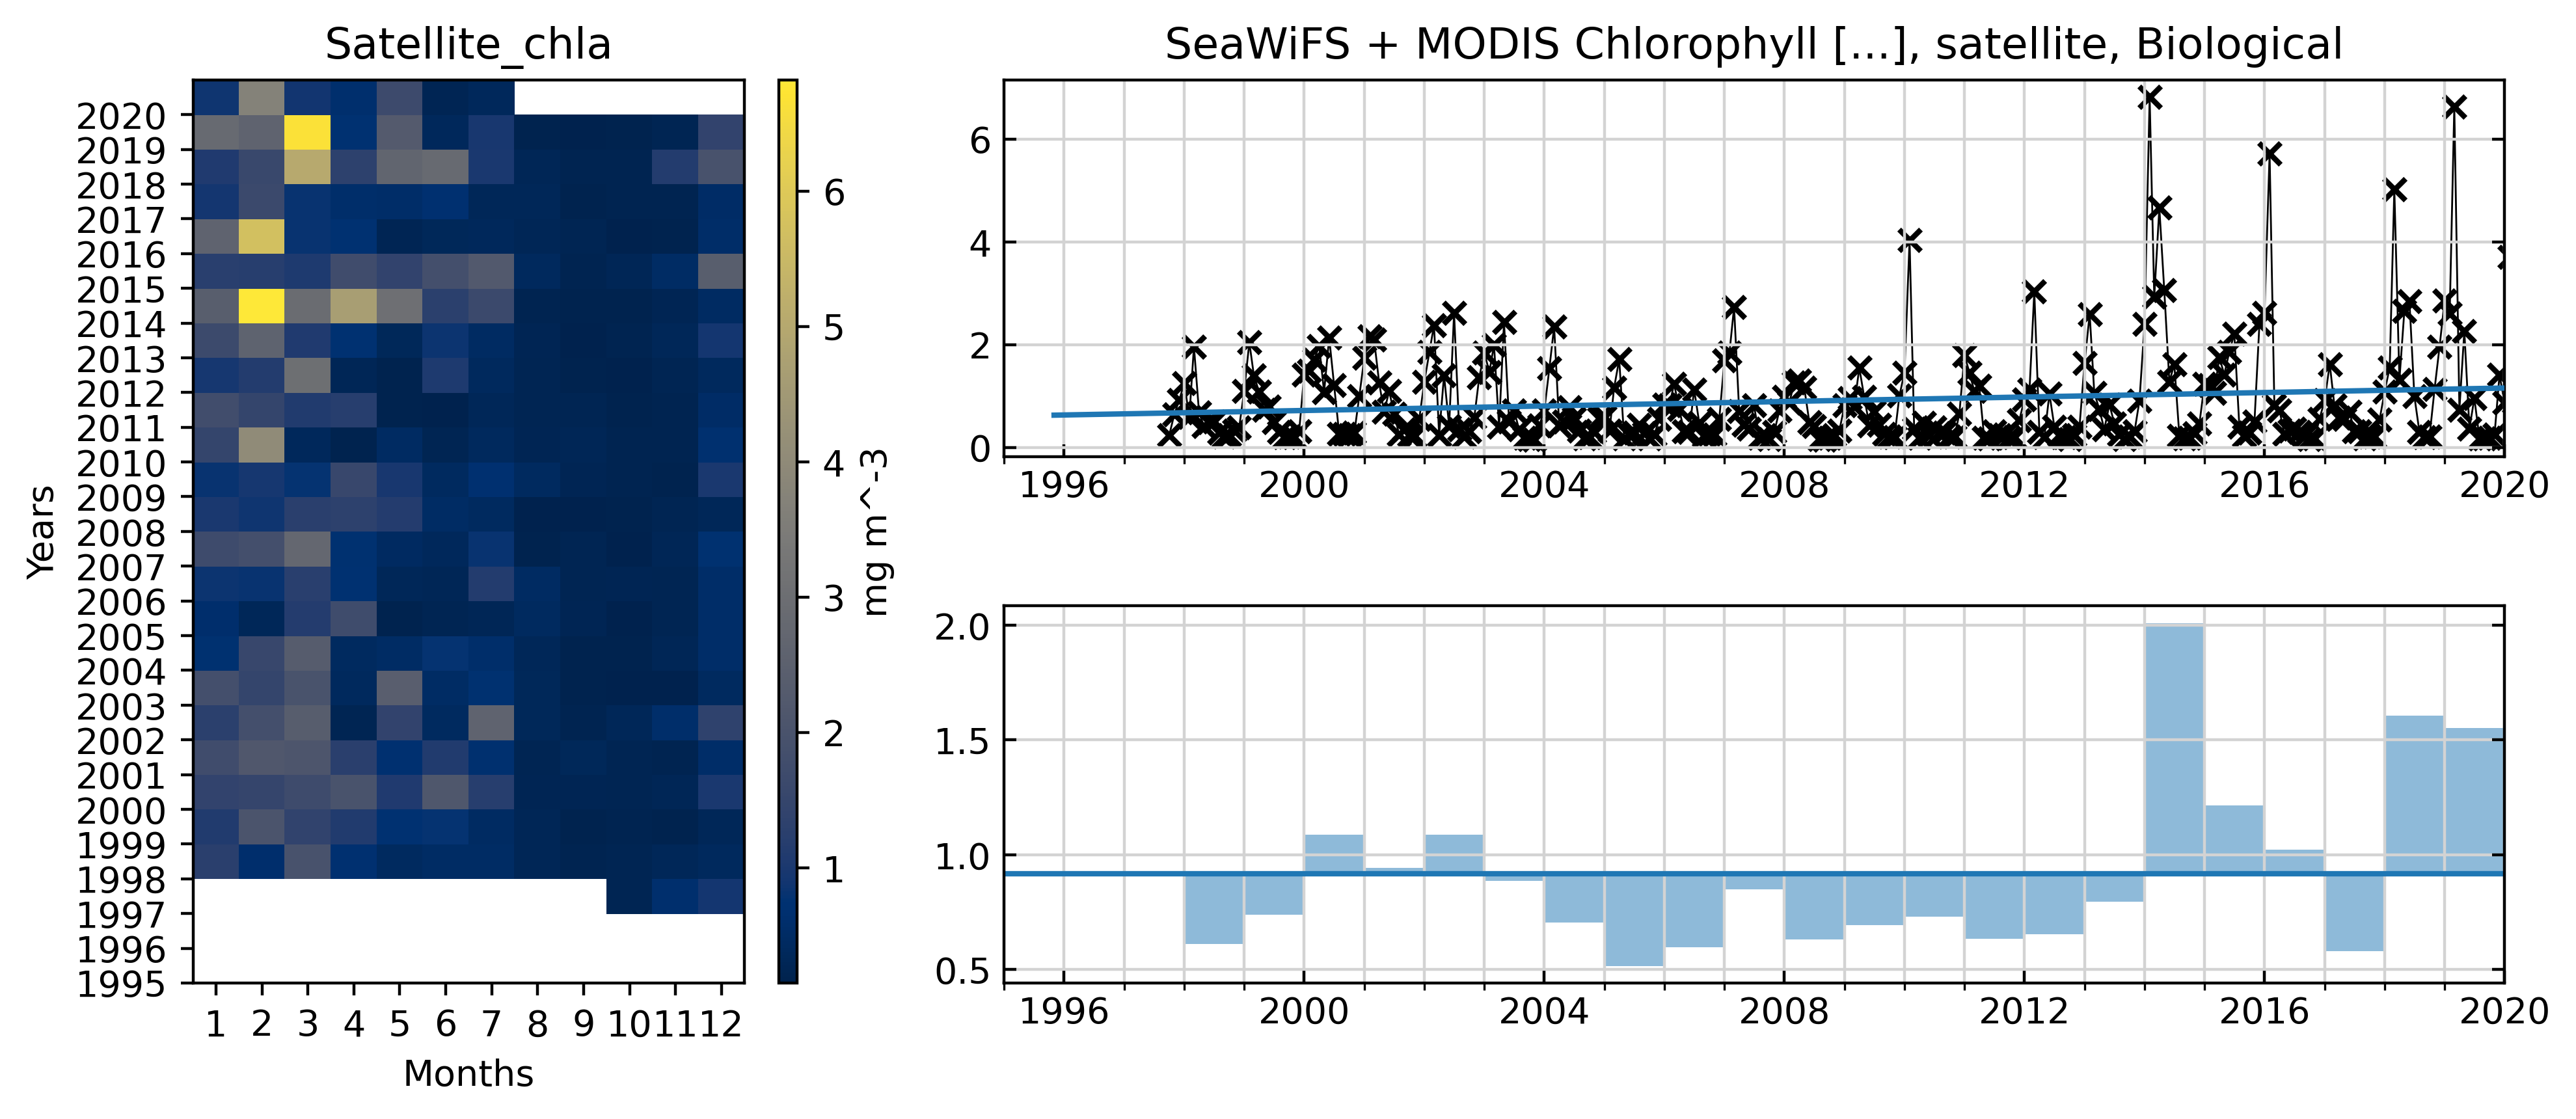

In [20]:
plotsingle3panelplot(CARIACO.Satellite_chla)
plt.savefig("PresentationPlots/Satellite/Satellite_MERGED_chla.png")